Из списка датасетов был выбран «Most Popular Programming Languages 2004-2024». Каждая строка датасета представляет данные за определенный месяц, начиная с января 2004 года и заканчивая сентябрем 2024 года, отслеживая тенденции популярности представленных языков программирования во всем мире. В выбранном датасете представлены исключительно числовые данные (данные представлены в процентах).

Этот набор данных содержит следующие атрибуты:
- Месяц: дата (в формате год-месяц), когда данные были записаны.
- Python Worldwide(%): процент глобальной популярности Python за этот месяц.
- JavaScript Worldwide(%): процент глобальной популярности JavaScript.
- Java Worldwide(%): процент глобальной популярности Java.
- C# Worldwide(%): процент глобальной популярности C#.
- PhP Worldwide(%): процент глобальной популярности PhP.
- Flutter Worldwide(%): процент глобальной популярности Flutter.
- React Worldwide(%): процент глобальной популярности React.
- Swift Worldwide(%): процент глобальной популярности Swift.
- TypeScript Worldwide(%): процент глобальной популярности TypeScript.
- Matlab Worldwide(%): процент глобальной популярности Matlab.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
df = pd.read_csv('Most Popular Programming Languages.csv')
df

,Month,Python Worldwide(%),JavaScript Worldwide(%),Java Worldwide(%),C# Worldwide(%),PhP Worldwide(%),Flutter Worldwide(%),React Worldwide(%),Swift Worldwide(%),TypeScript Worldwide(%),Matlab Worldwide(%)
0,2004-01,30,98,96,76,100,6,1,9,2,78
1,2004-02,29,98,97,86,99,6,2,9,1,91
2,2004-03,28,100,100,87,97,5,2,9,2,99
3,2004-04,28,98,97,89,100,6,1,9,2,95
4,2004-05,28,91,99,84,92,6,2,10,3,86
...,...,...,...,...,...,...,...,...,...,...,...
244,2024-05,80,36,14,32,18,92,96,61,80,69
245,2024-06,76,32,14,30,18,84,87,61,76,67
246,2024-07,75,33,14,29,17,84,92,55,80,65
247,2024-08,71,31,13,27,18,82,86,58,76,65


In [3]:
#Атрибут, показывающий разницу популярности между Python Worldwide(%) и JavaScript Worldwide(%) в процентах
df['Distinction_Python_JavaScript(%)'] = df['Python Worldwide(%)'] - df['JavaScript Worldwide(%)']
df

,Month,Python Worldwide(%),JavaScript Worldwide(%),Java Worldwide(%),C# Worldwide(%),PhP Worldwide(%),Flutter Worldwide(%),React Worldwide(%),Swift Worldwide(%),TypeScript Worldwide(%),Matlab Worldwide(%),Distinction_Python_JavaScript(%)
0,2004-01,30,98,96,76,100,6,1,9,2,78,-68
1,2004-02,29,98,97,86,99,6,2,9,1,91,-69
2,2004-03,28,100,100,87,97,5,2,9,2,99,-72
3,2004-04,28,98,97,89,100,6,1,9,2,95,-70
4,2004-05,28,91,99,84,92,6,2,10,3,86,-63
...,...,...,...,...,...,...,...,...,...,...,...,...
244,2024-05,80,36,14,32,18,92,96,61,80,69,44
245,2024-06,76,32,14,30,18,84,87,61,76,67,44
246,2024-07,75,33,14,29,17,84,92,55,80,65,42
247,2024-08,71,31,13,27,18,82,86,58,76,65,40


In [4]:
df[df.duplicated()]

,Month,Python Worldwide(%),JavaScript Worldwide(%),Java Worldwide(%),C# Worldwide(%),PhP Worldwide(%),Flutter Worldwide(%),React Worldwide(%),Swift Worldwide(%),TypeScript Worldwide(%),Matlab Worldwide(%),Distinction_Python_JavaScript(%)


In [5]:
def detect_and_clean_outliers_iqr(df):
    # Выбор числовых столбцов
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

    outlier_mask = pd.Series(False, index=df.index) 

    for column in numeric_cols:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        
        LowerBound = Q1 - 1.5 * IQR
        UpperBound = Q3 + 1.5 * IQR
        
        IQR_Outliers = (df[column] < LowerBound) | (df[column] > UpperBound)
        outlier_mask |= IQR_Outliers 

        outlier_values = df[IQR_Outliers][column]

        if not outlier_values.empty:
            print(f"Выбросы в столбце {column}:")
            print(outlier_values)  # Выводим все выбросы
            number_of_outliers = outlier_values.shape[0]
            print(f"Количество выбросов в столбце {column}: {number_of_outliers}")
        else:
            print(f"Выбросов не обнаружено в столбце {column}.")

    # Удаляем выбросы 
    df_cleaned = df[~outlier_mask]

    return df_cleaned.reset_index(drop=True)  # Возвращаем очищенный 

In [6]:
df_cleaned = detect_and_clean_outliers_iqr(df)
print("Очистка завершена.")
print(df_cleaned)

Выбросов не обнаружено в столбце Python Worldwide(%).
Выбросы в столбце JavaScript Worldwide(%):
0      98
1      98
2     100
3      98
4      91
5      94
6      93
7      91
8      91
9      78
10     83
11     82
12     75
13     81
14     75
15     75
16     77
17     80
18     78
19     74
20     71
21     74
22     71
26     71
Name: JavaScript Worldwide(%), dtype: int64
Количество выбросов в столбце JavaScript Worldwide(%): 24
Выбросы в столбце Java Worldwide(%):
0      96
1      97
2     100
3      97
4      99
5      89
6      89
7      89
8      91
9      93
10     90
13     89
Name: Java Worldwide(%), dtype: int64
Количество выбросов в столбце Java Worldwide(%): 12
Выбросов не обнаружено в столбце C# Worldwide(%).
Выбросы в столбце PhP Worldwide(%):
0     100
1      99
2      97
3     100
4      92
5      97
6      99
7      94
8      93
12     92
13     91
Name: PhP Worldwide(%), dtype: int64
Количество выбросов в столбце PhP Worldwide(%): 11
Выбросы в столбце Flutter Worl

In [7]:
print('Количество пропущенных значений:',df['Python Worldwide(%)'].isnull().sum())
print('Количество пропущенных значений:',df['JavaScript Worldwide(%)'].isnull().sum())
print('Количество пропущенных значений:',df['Java Worldwide(%)'].isnull().sum())
print('Количество пропущенных значений:',df['C# Worldwide(%)'].isnull().sum())
print('Количество пропущенных значений:',df['PhP Worldwide(%)'].isnull().sum())
print('Количество пропущенных значений:',df['Flutter Worldwide(%)'].isnull().sum())
print('Количество пропущенных значений:',df['React Worldwide(%)'].isnull().sum())
print('Количество пропущенных значений:',df['Swift Worldwide(%)'].isnull().sum())
print('Количество пропущенных значений:',df['TypeScript Worldwide(%)'].isnull().sum())
print('Количество пропущенных значений:',df['Matlab Worldwide(%)'].isnull().sum())

Количество пропущенных значений: 0
Количество пропущенных значений: 0
Количество пропущенных значений: 0
Количество пропущенных значений: 0
Количество пропущенных значений: 0
Количество пропущенных значений: 0
Количество пропущенных значений: 0
Количество пропущенных значений: 0
Количество пропущенных значений: 0
Количество пропущенных значений: 0


In [8]:
def detect_and_visualize_outliers_horizontal(df):
    # Выбор числовых столбцов 
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

    if len(numeric_cols) == 0:
        print("Нет числовых столбцов для визуализации.")
        return

    num_cols = len(numeric_cols)
    num_rows = (num_cols // 4) + (num_cols % 4 > 0)  
    plt.figure(figsize=(15, num_rows * 4))

    for i, col in enumerate(numeric_cols):
        plt.subplot(num_rows, 4, i + 1)  # Определяем строки и столбцы
        sns.boxplot(y=df[col], width=0.3) 
        plt.title(f'Ящичный график:\n{col}')

    plt.tight_layout()
    plt.show()

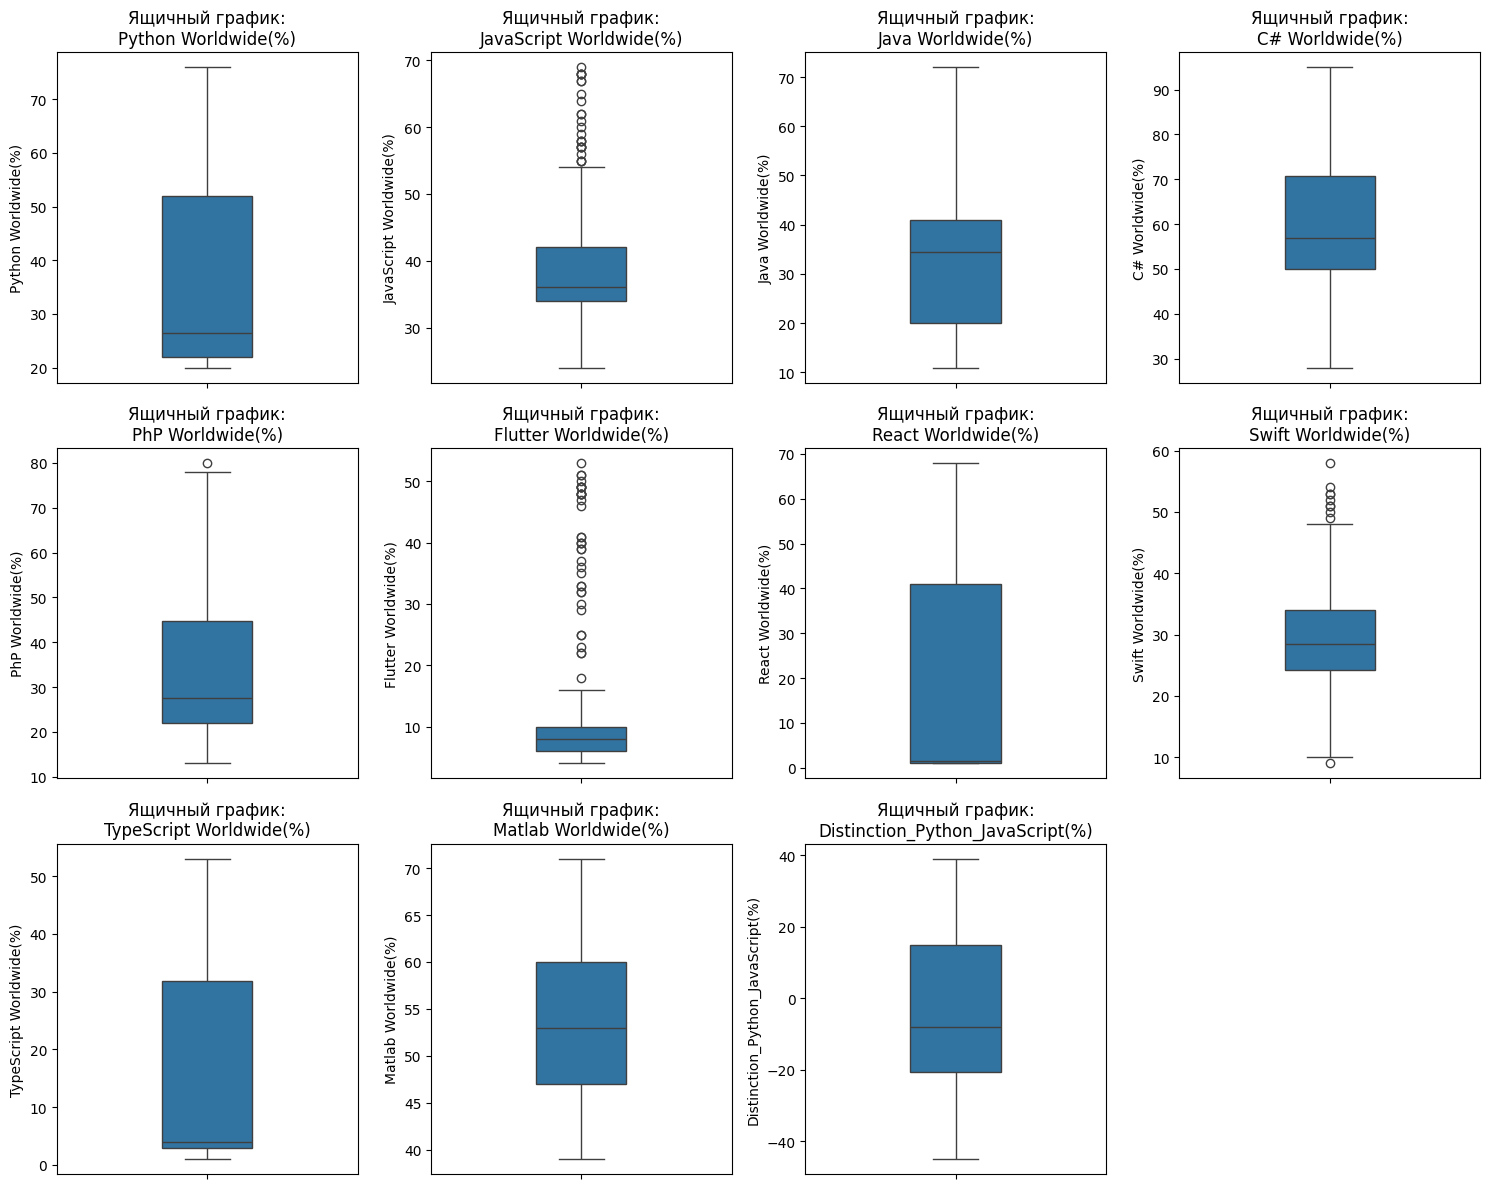

In [9]:
detect_and_visualize_outliers_horizontal(df_cleaned)

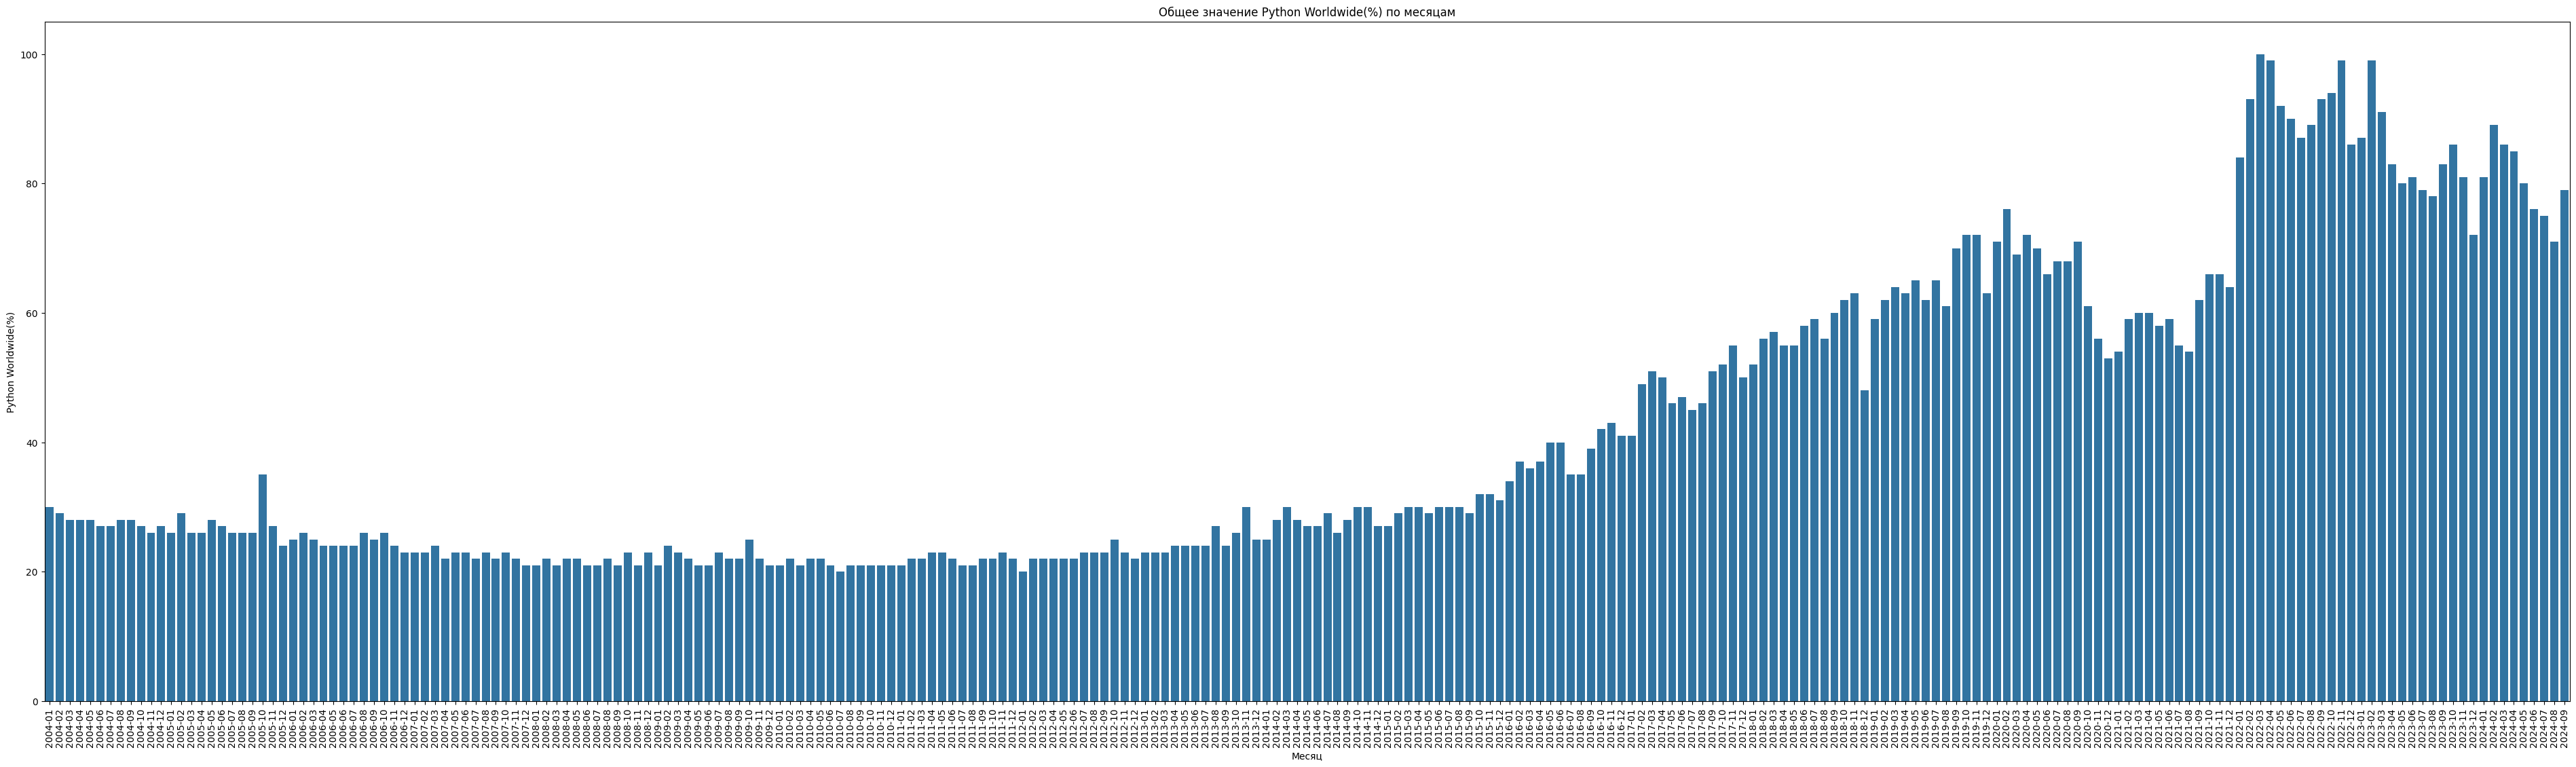

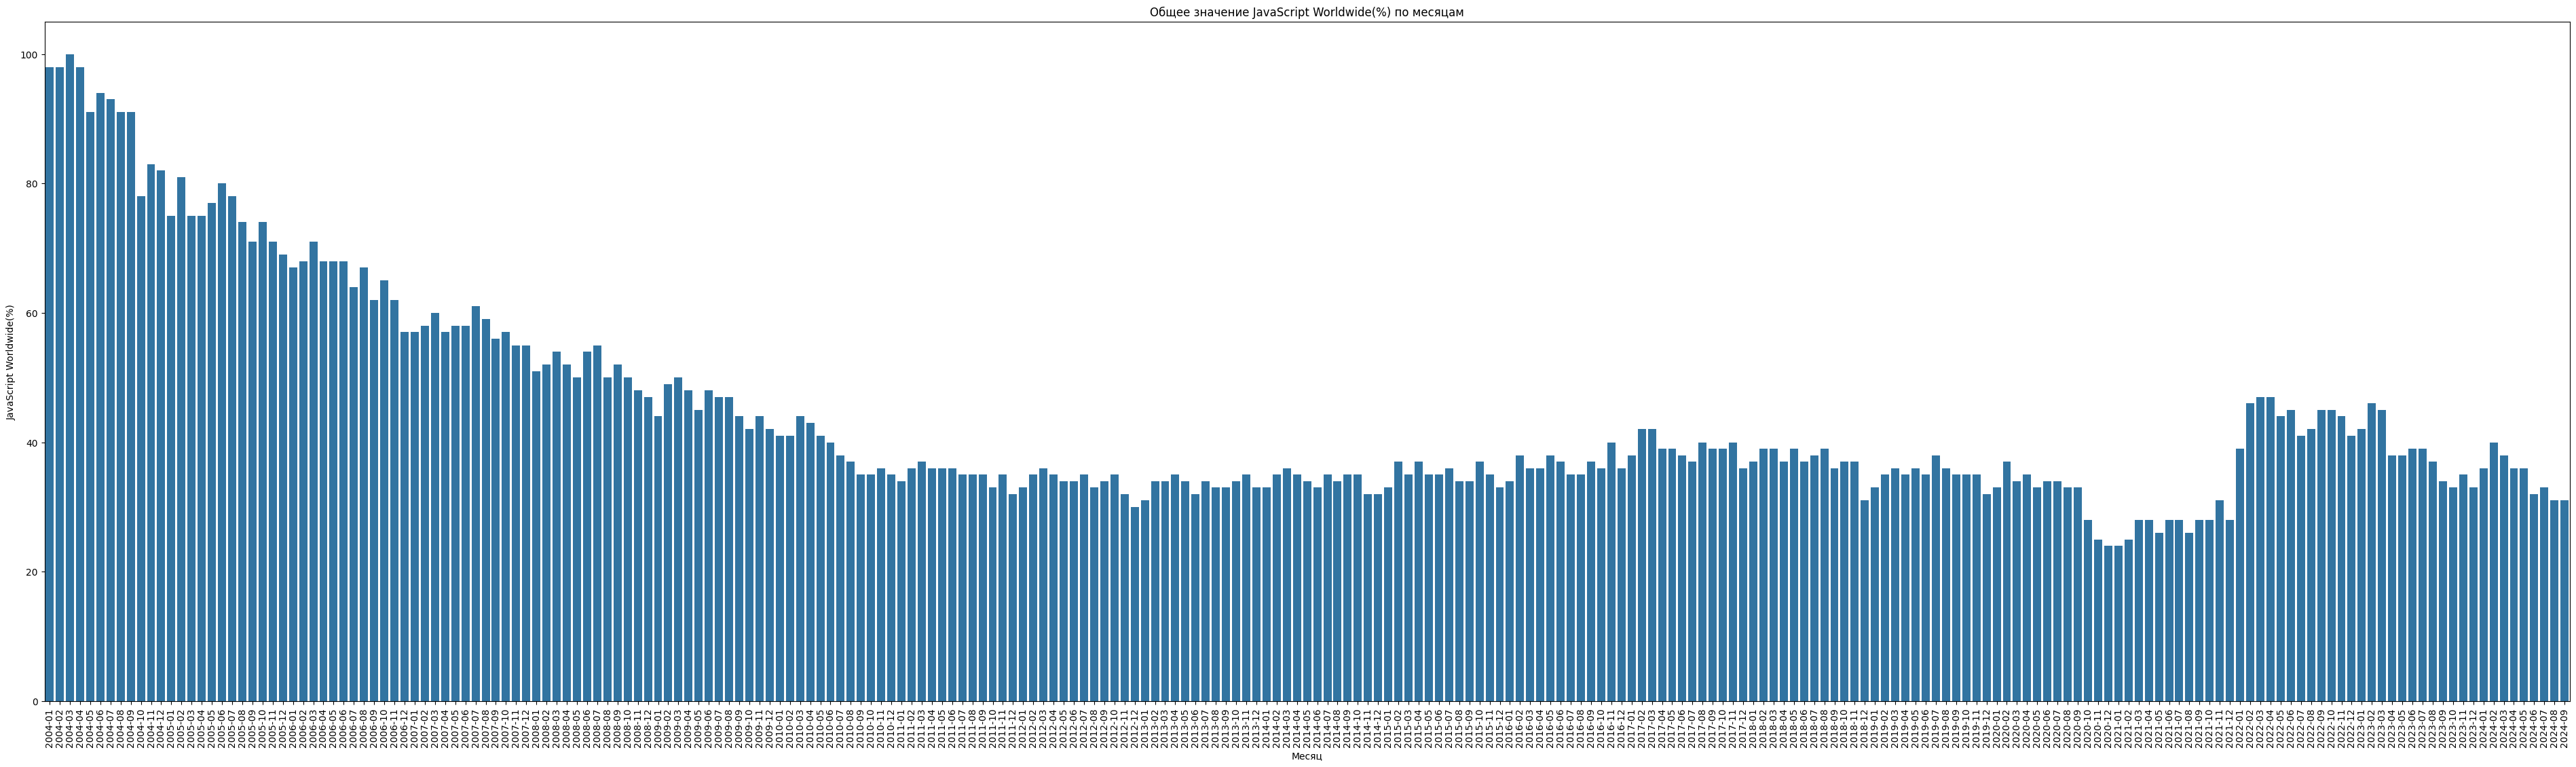

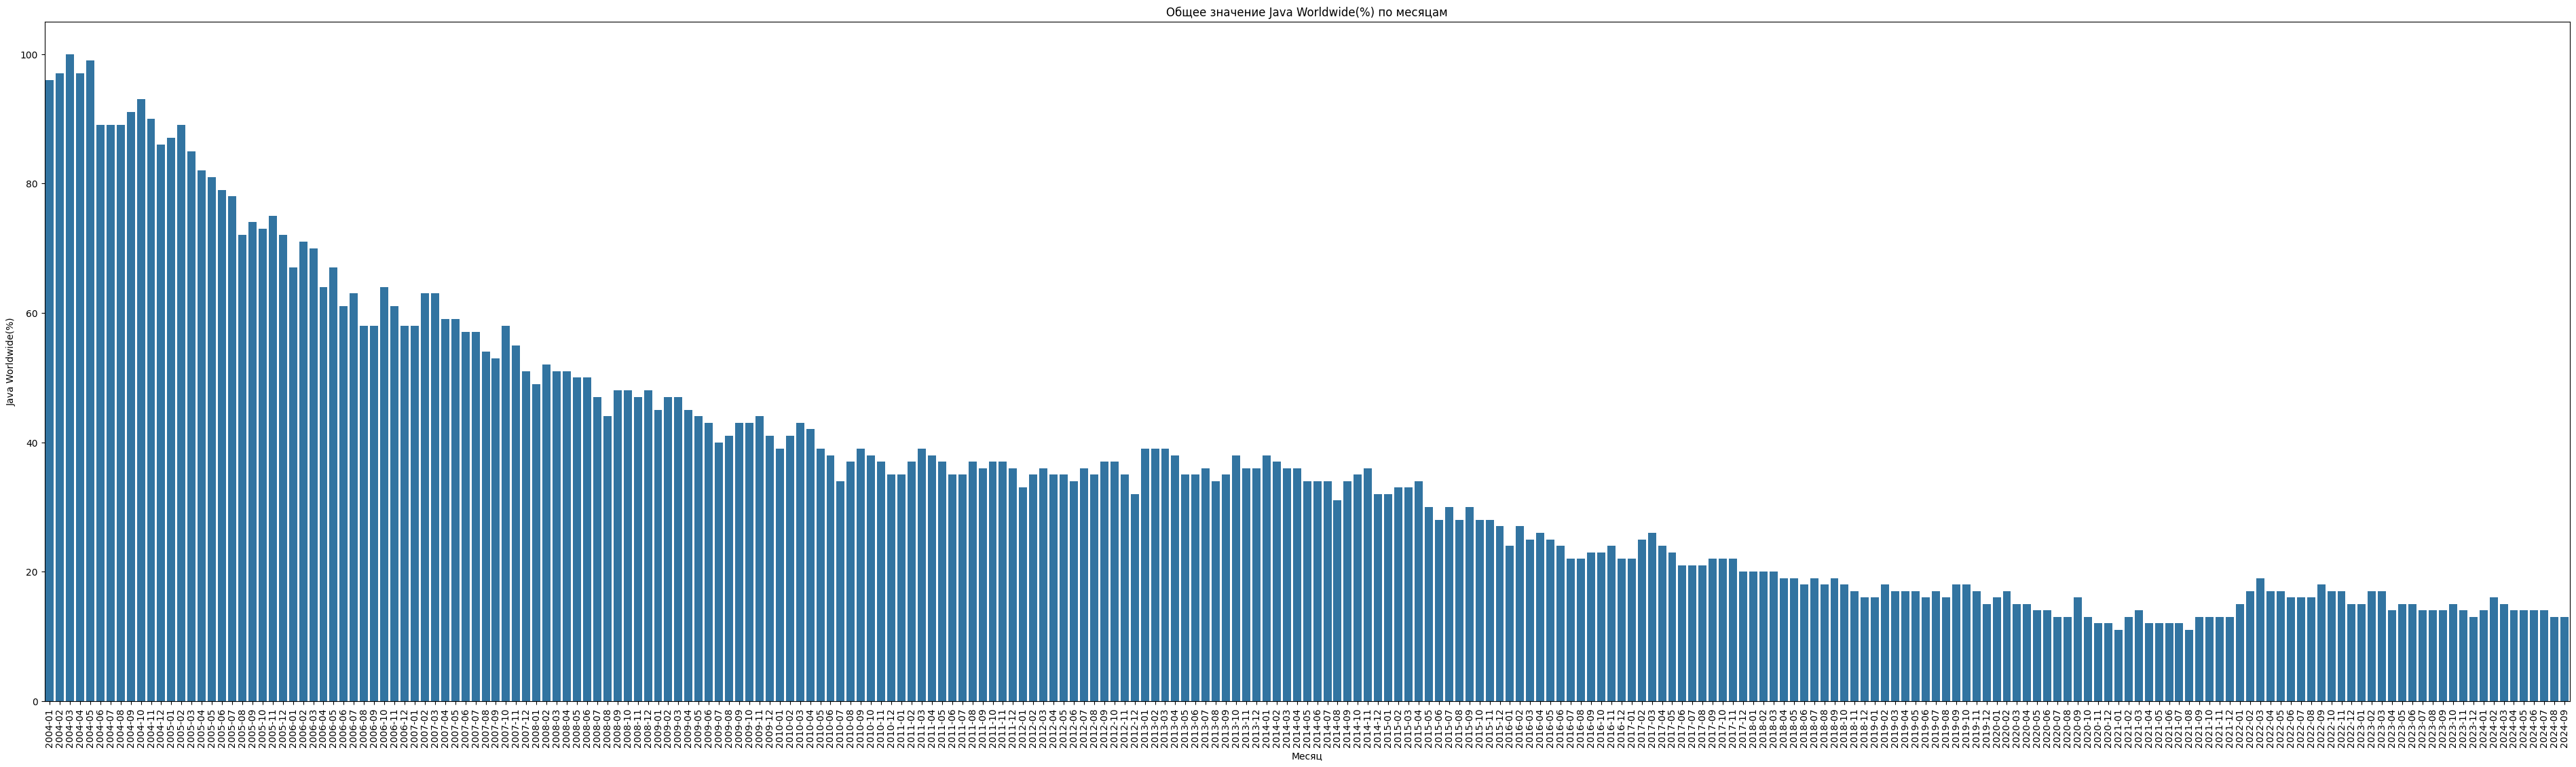

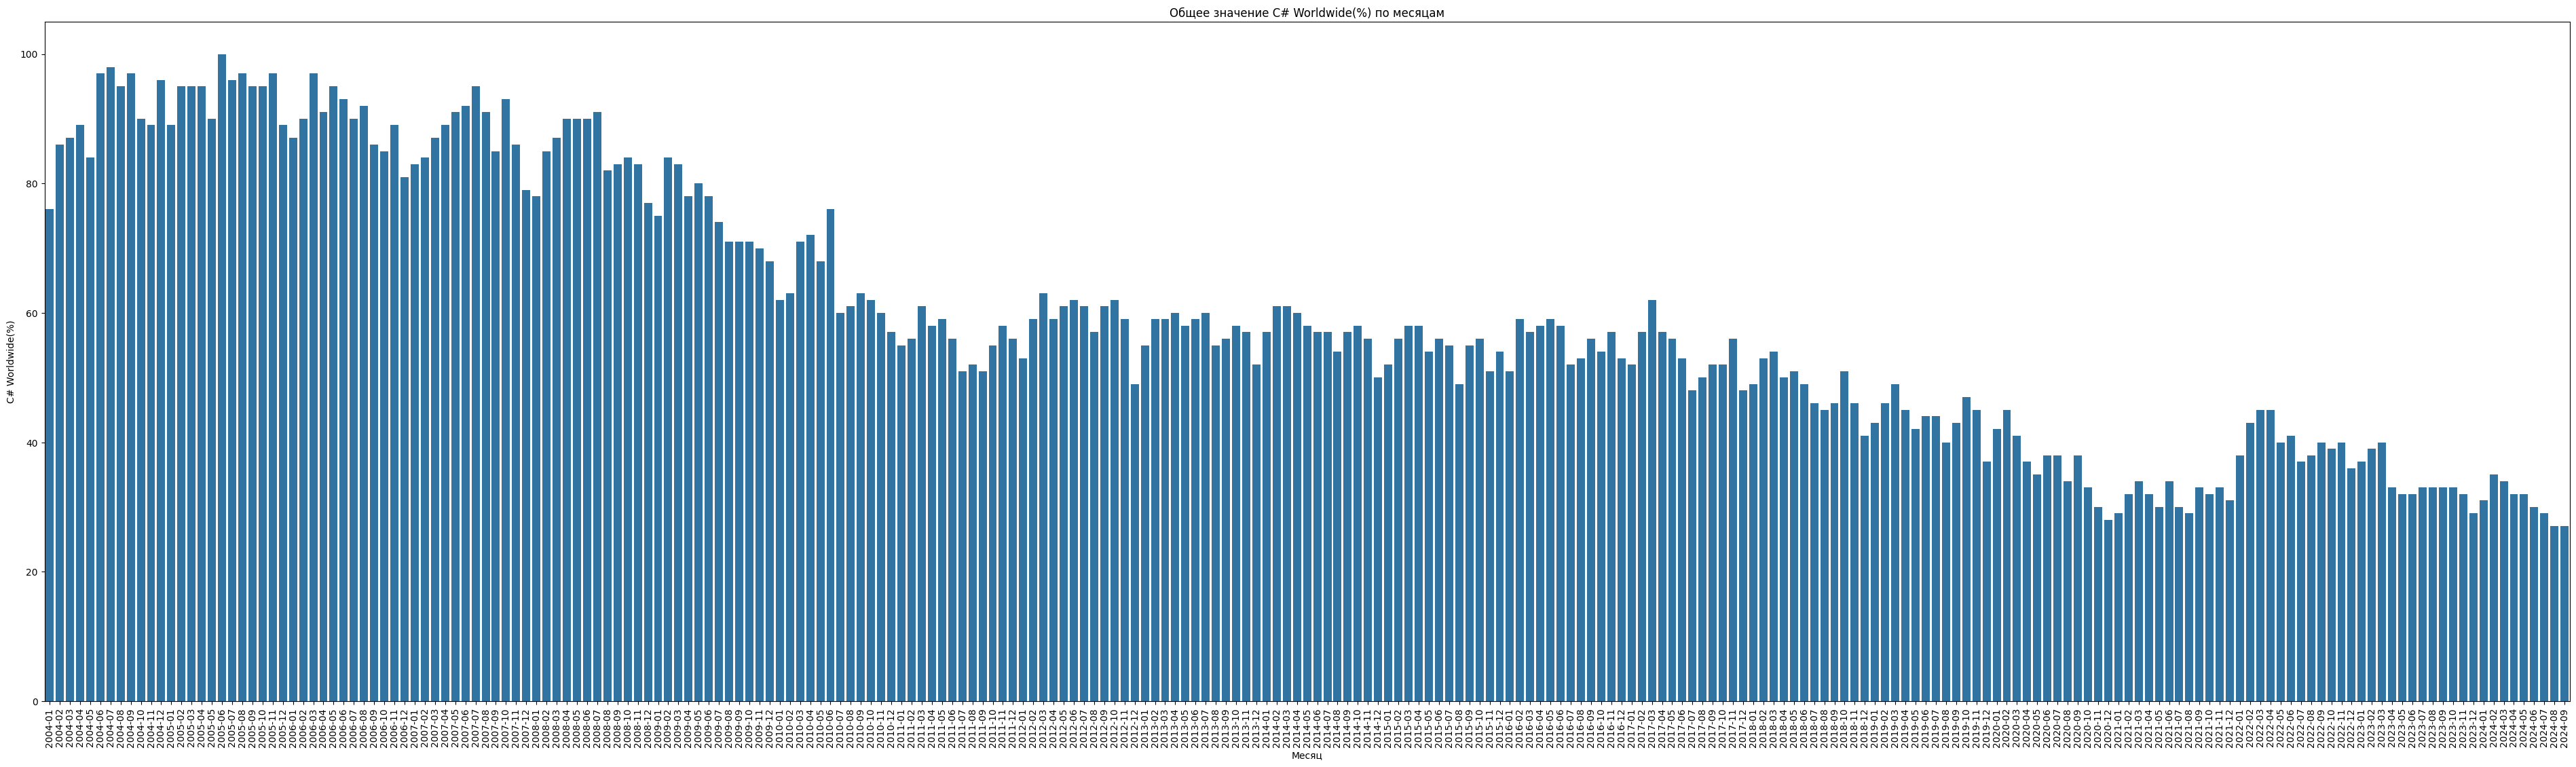

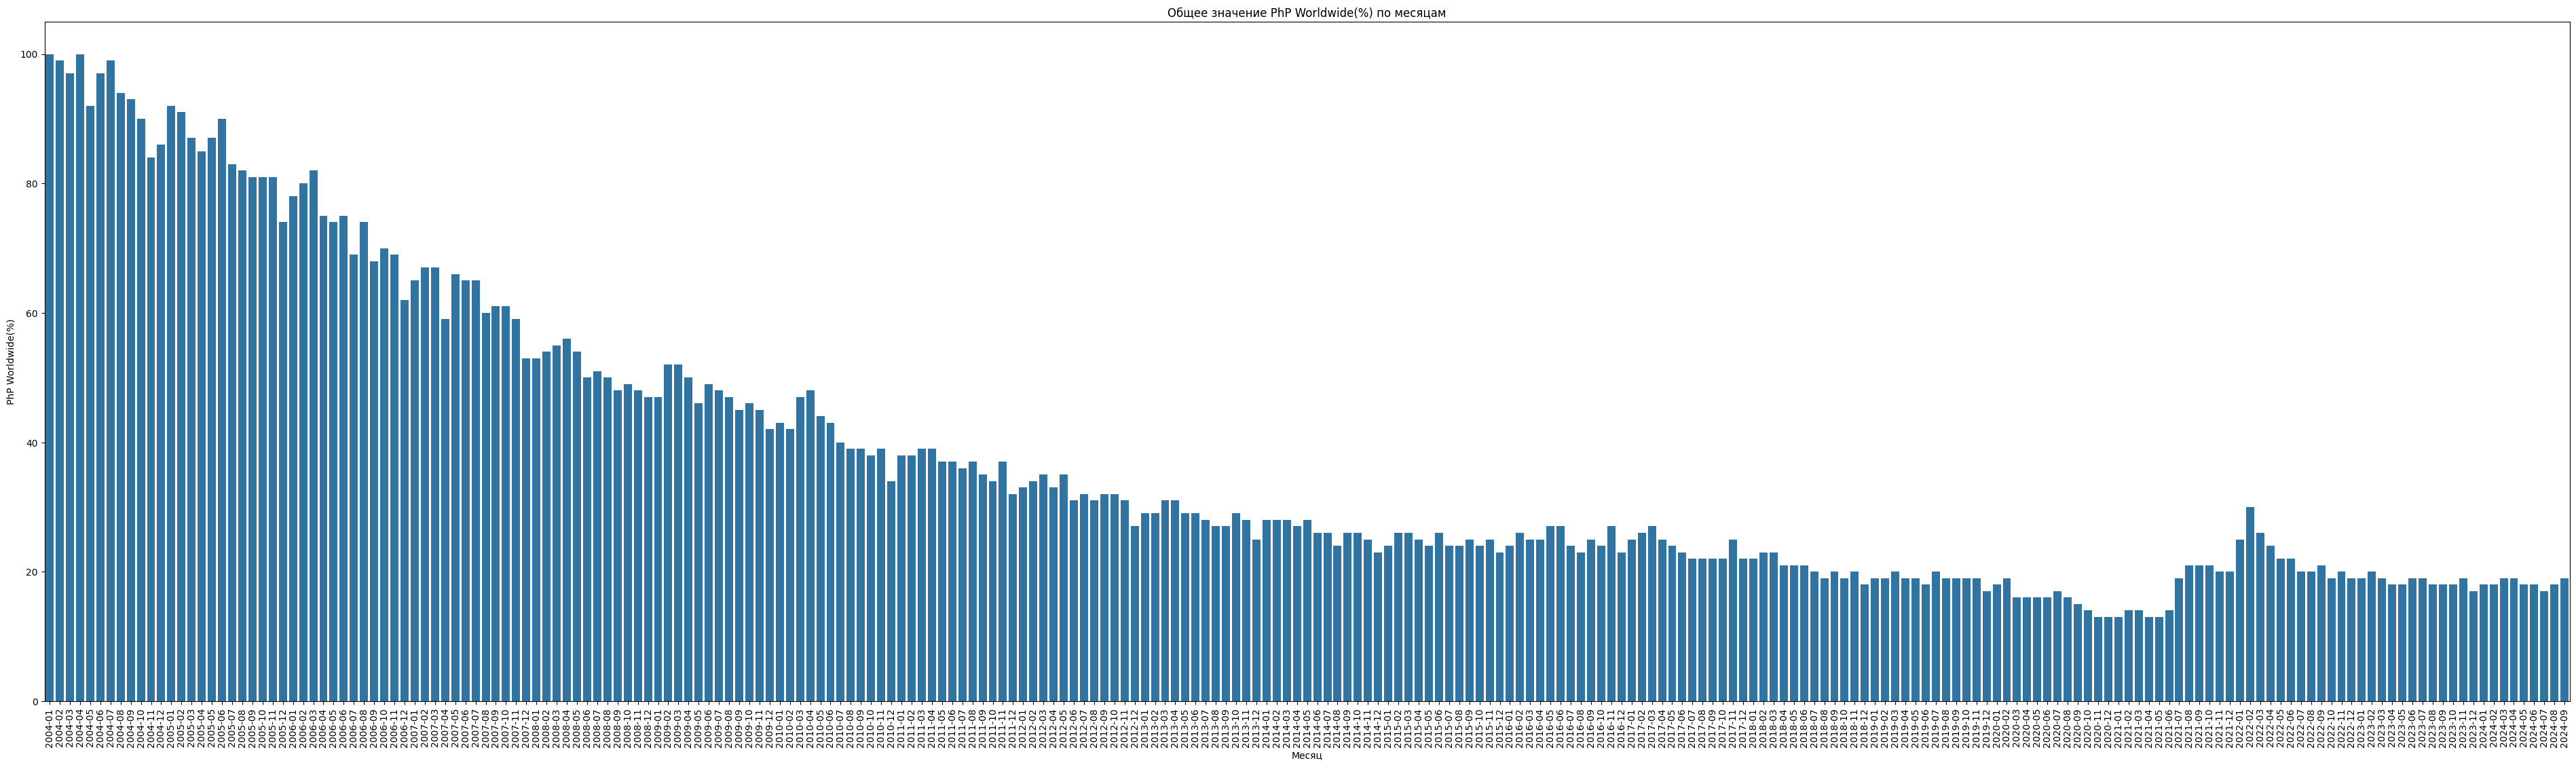

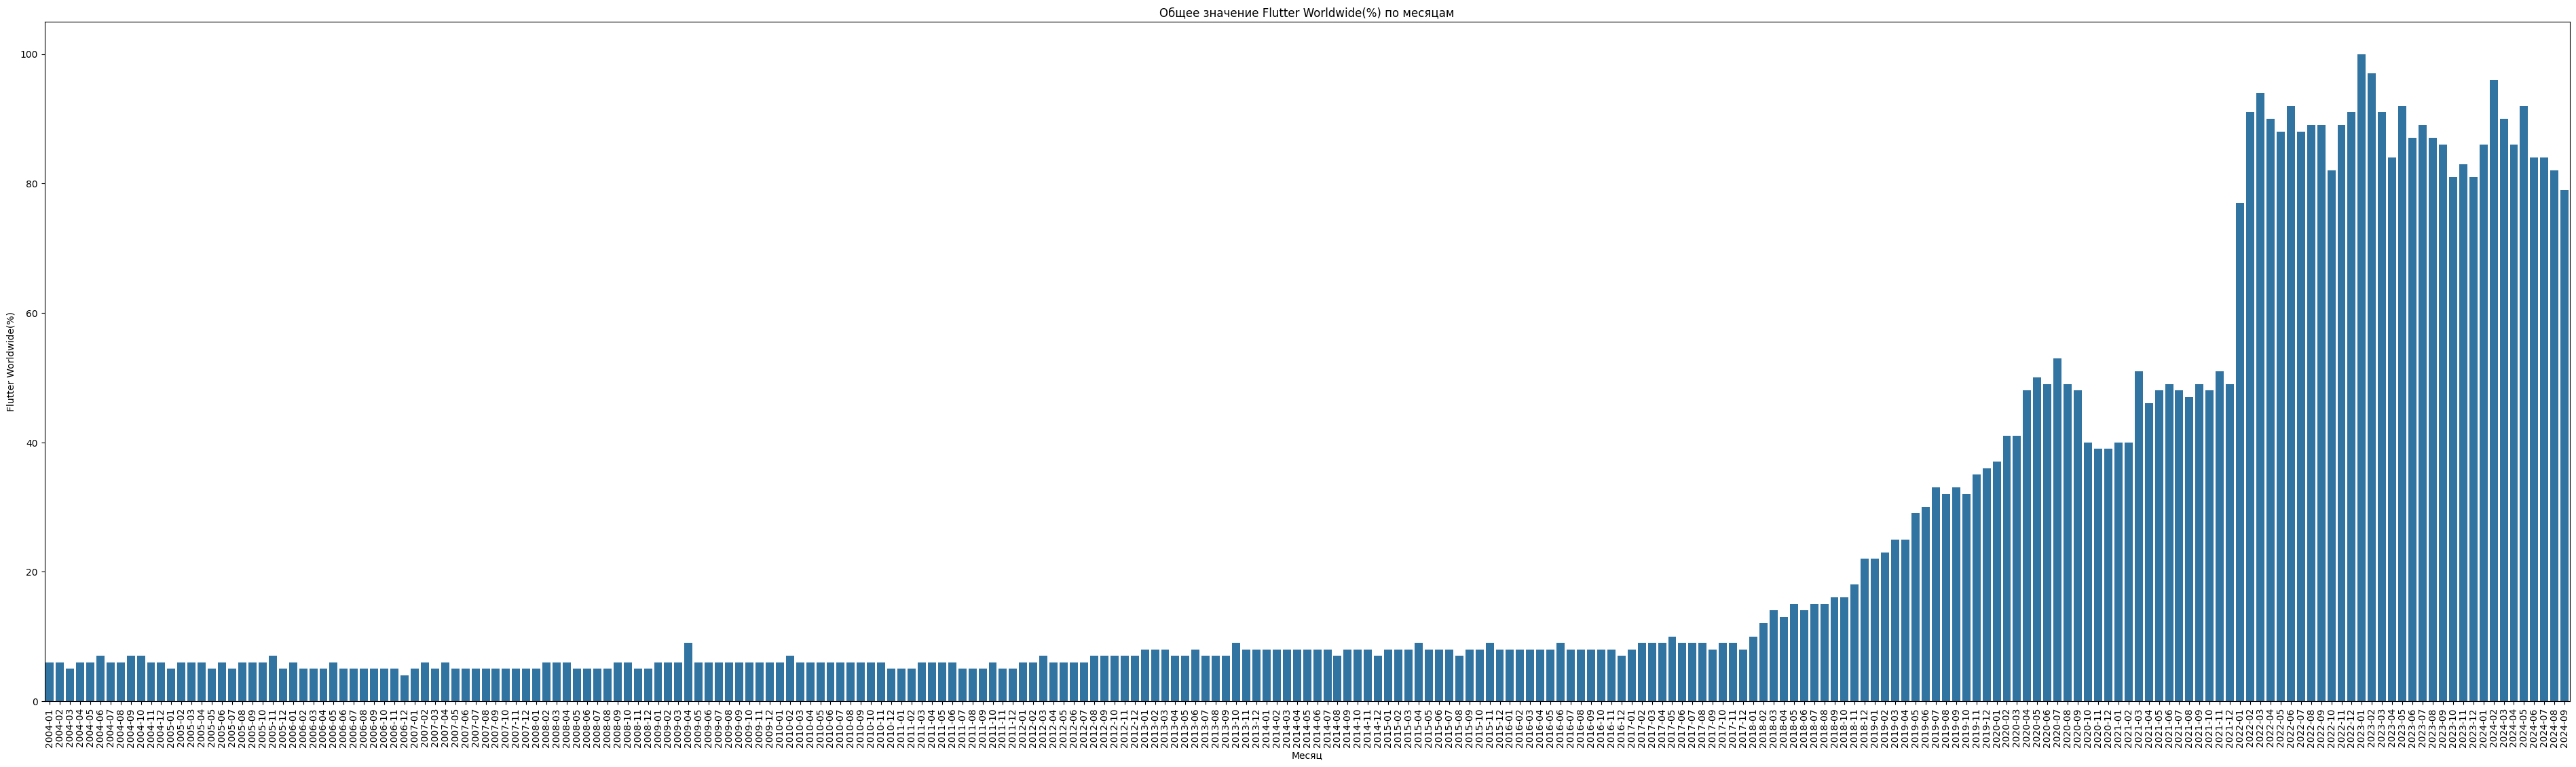

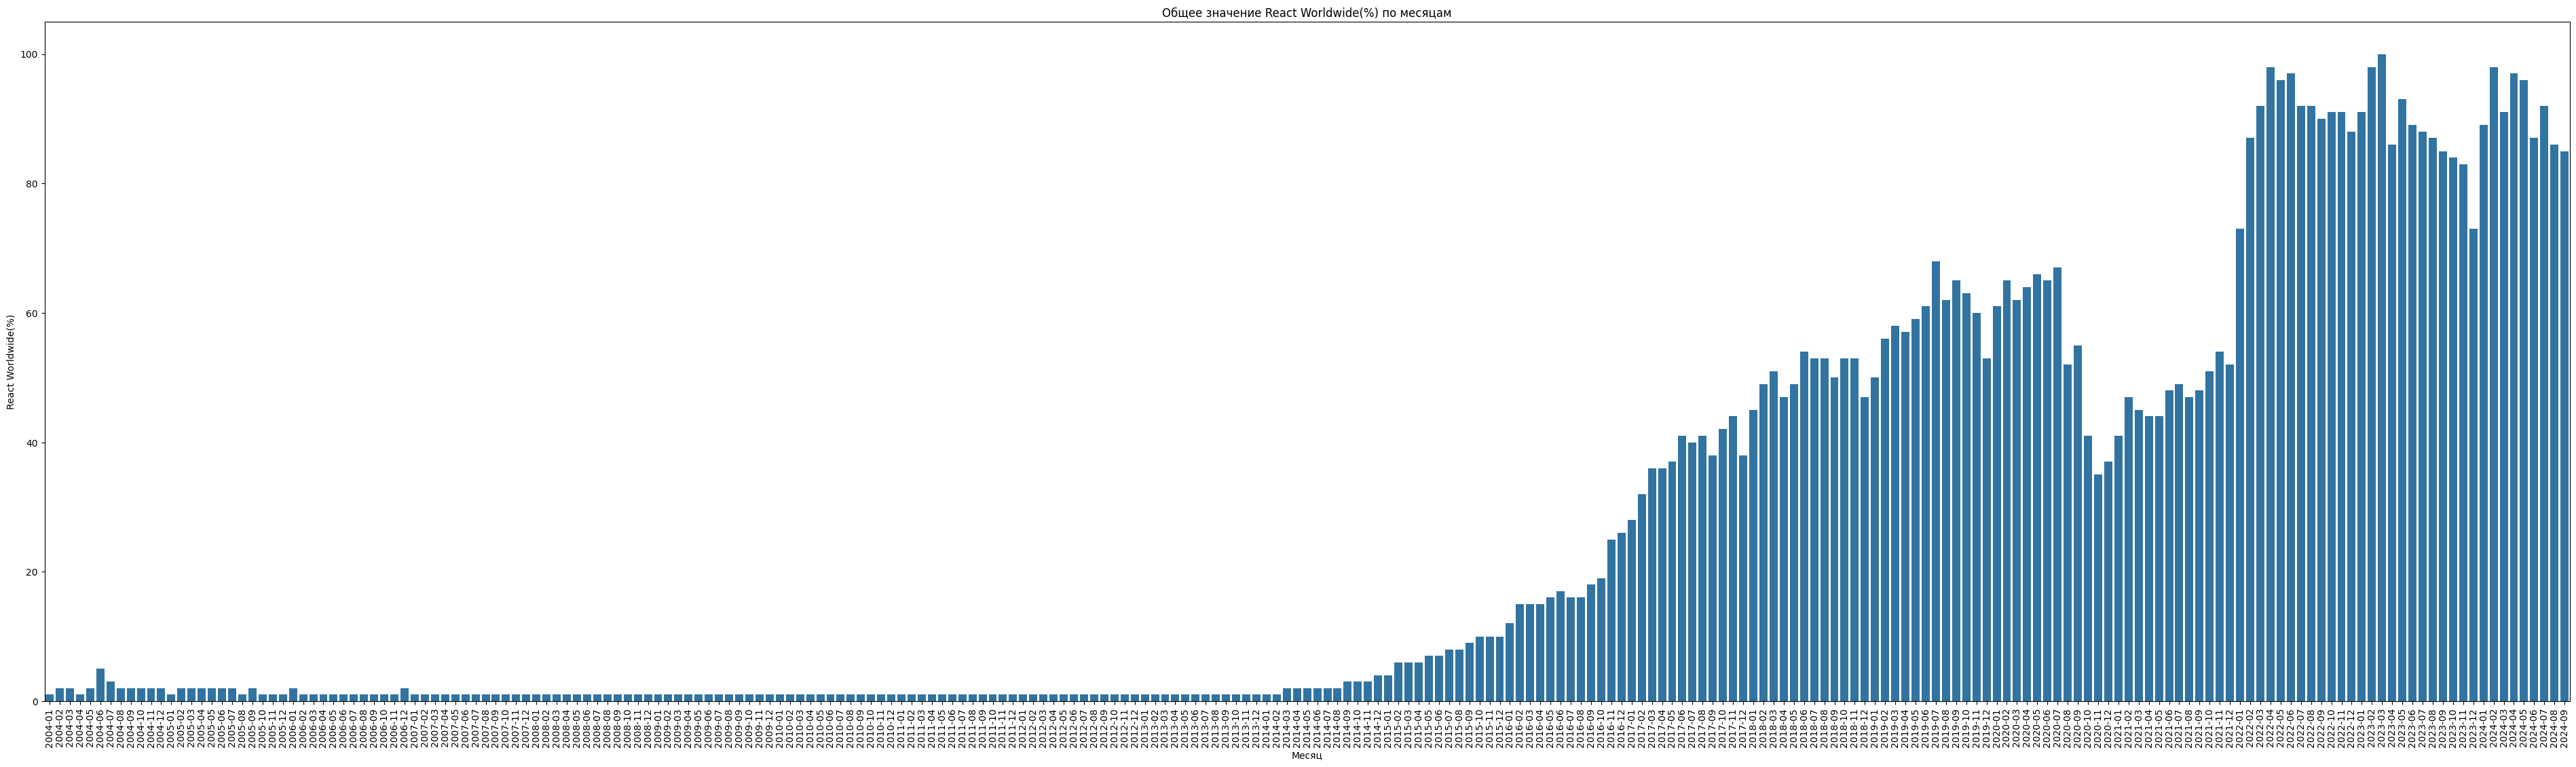

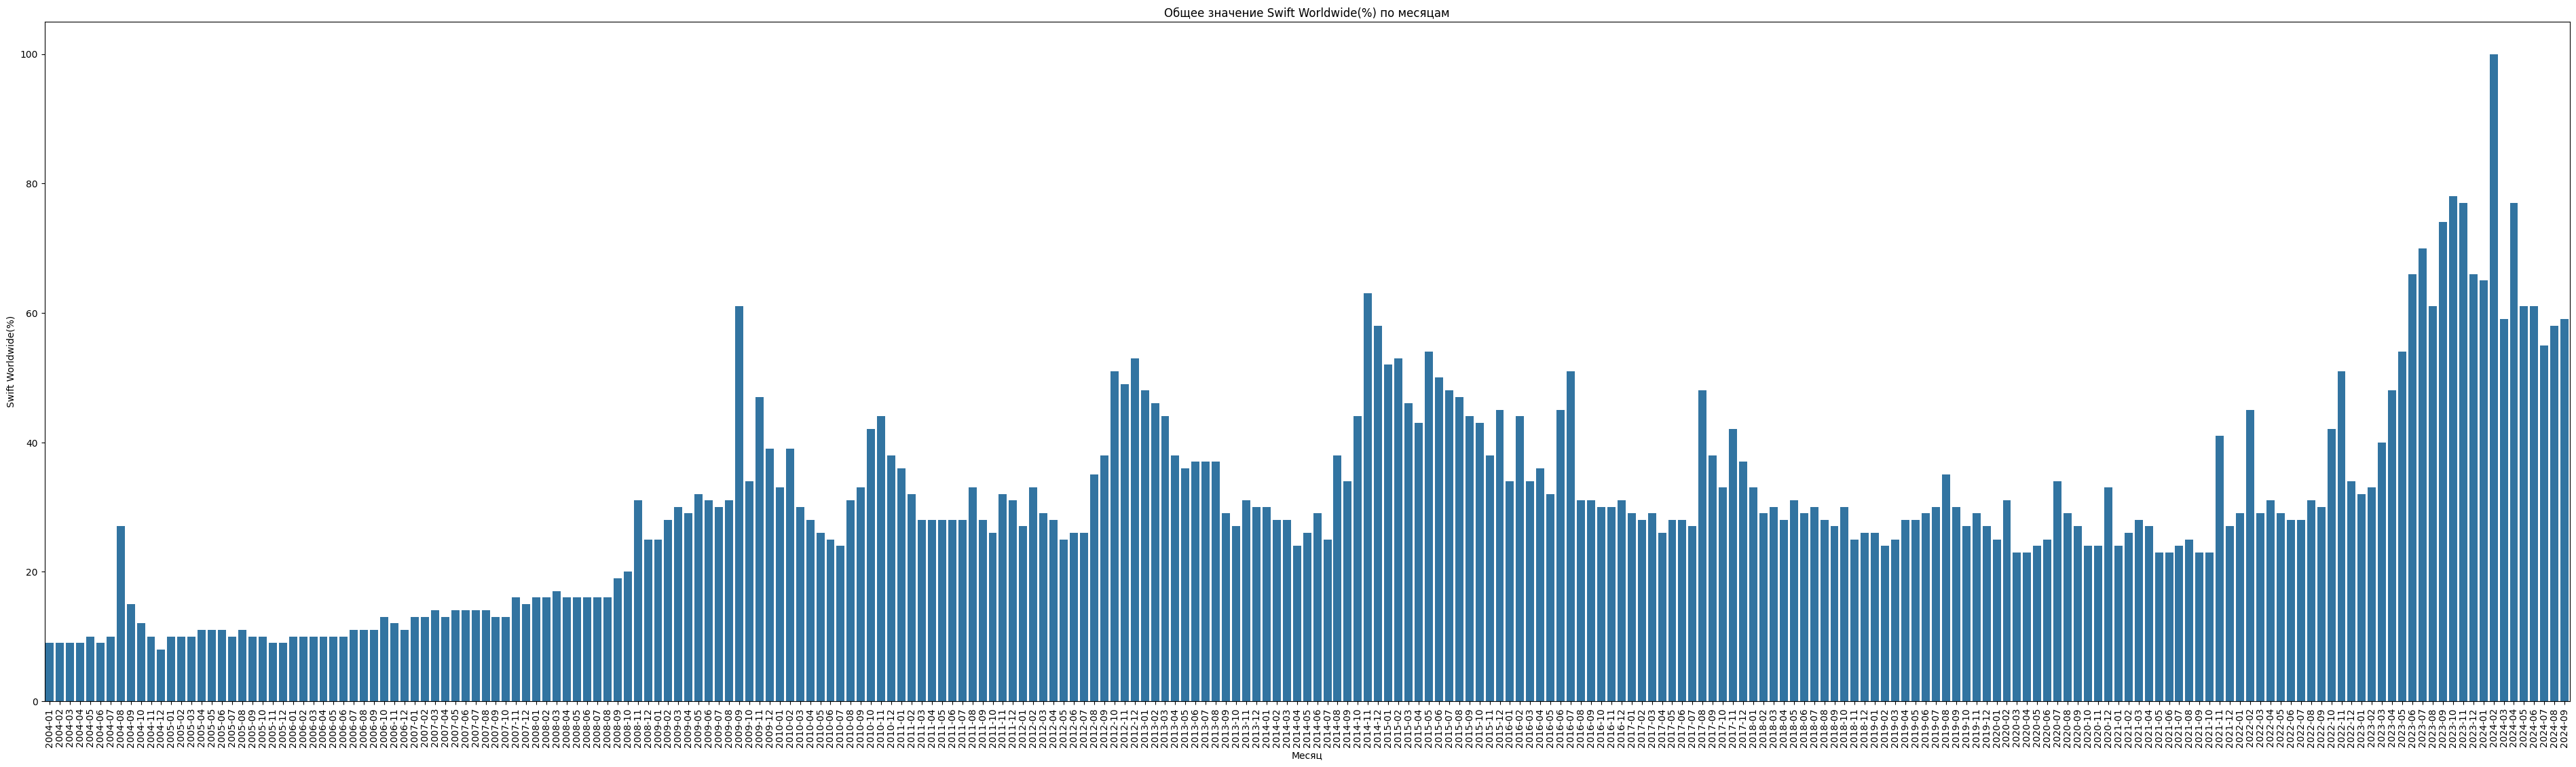

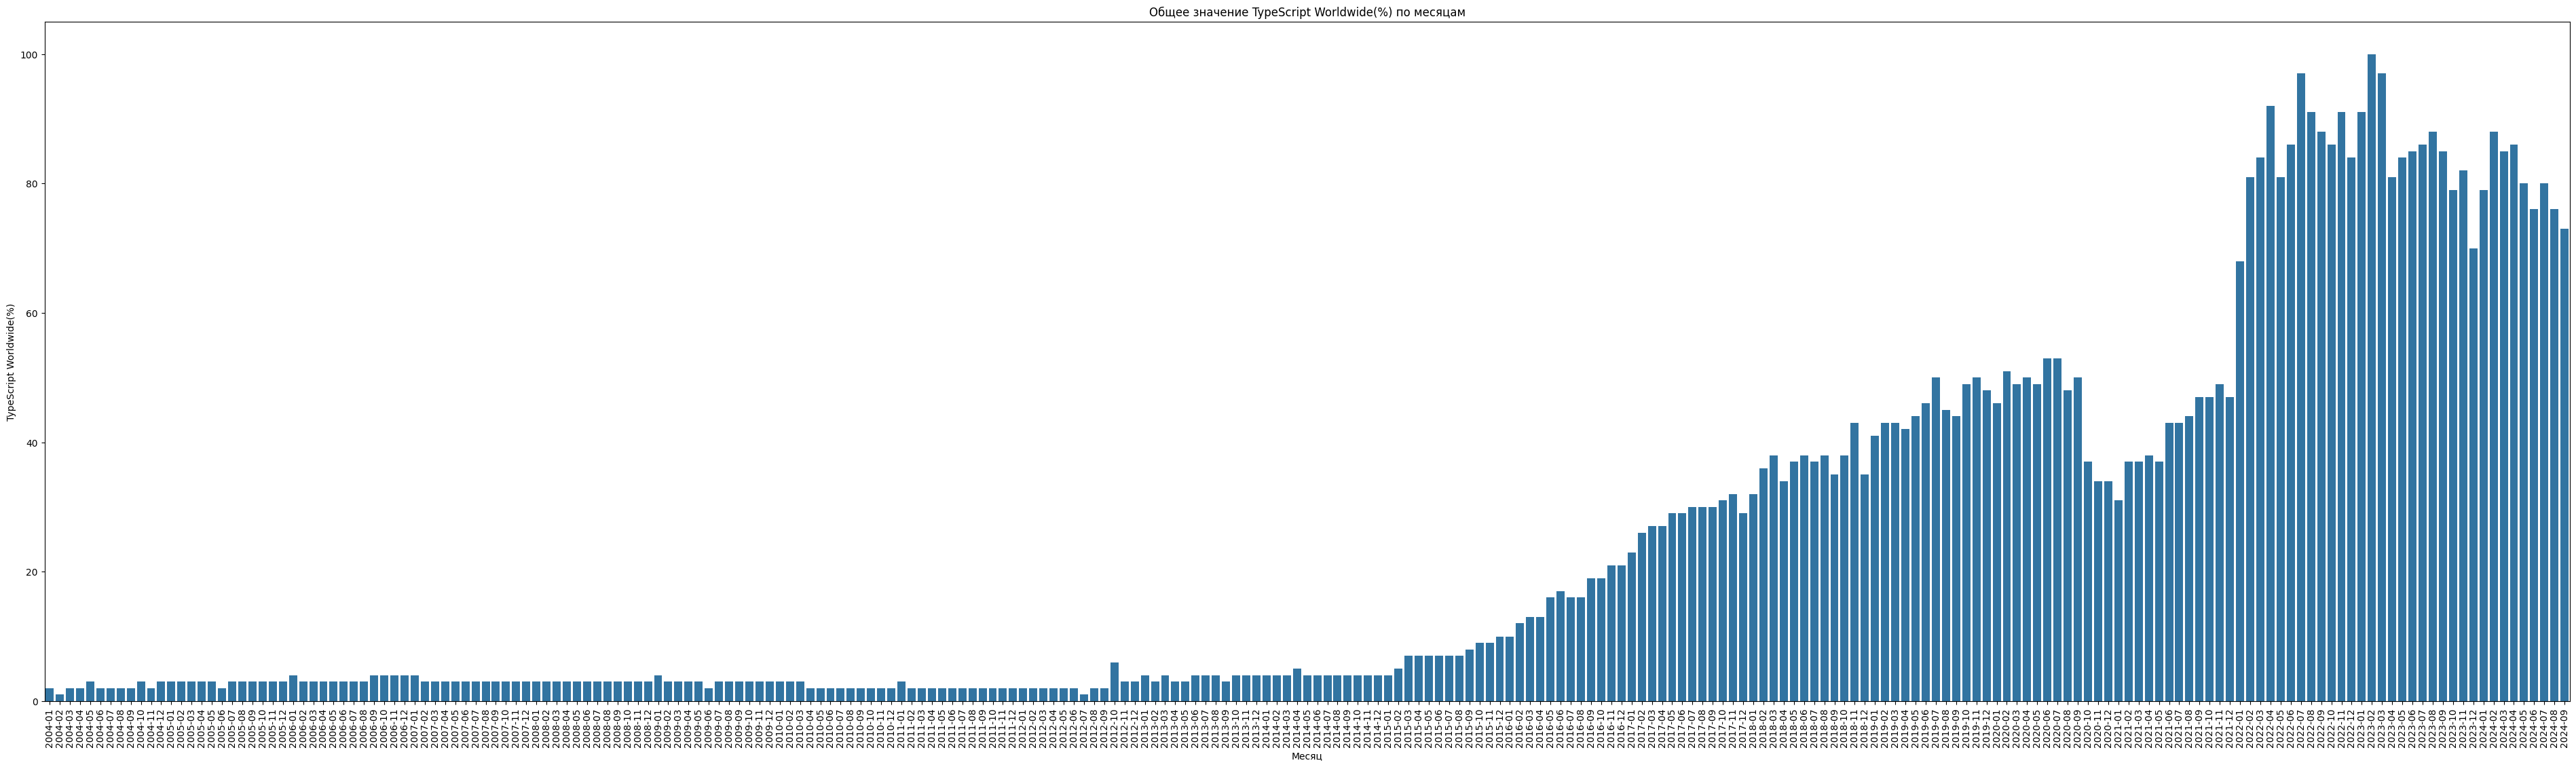

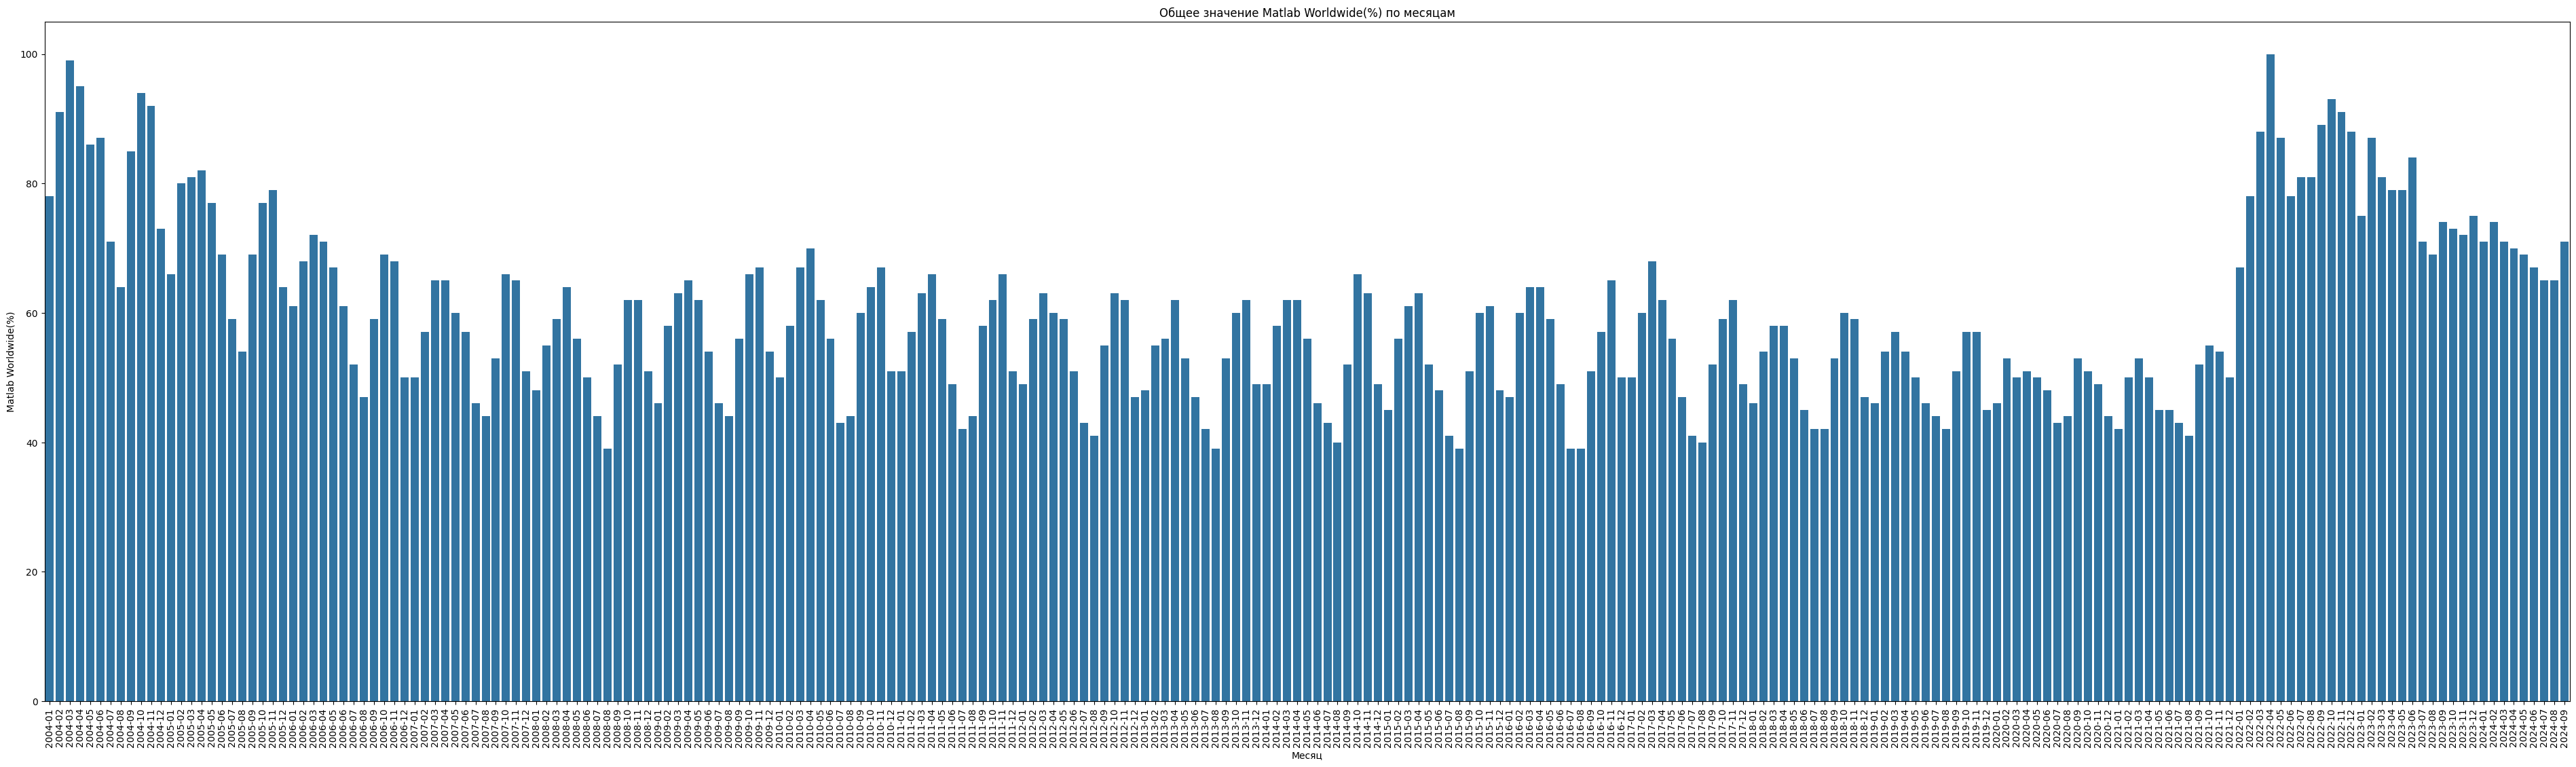

In [28]:
plt.figure(figsize=(48, 13))
sns.barplot(x='Month', y='Python Worldwide(%)', data=df, estimator=sum)
plt.title('Общее значение Python Worldwide(%) по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Python Worldwide(%)')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(48, 13))
sns.barplot(x='Month', y='JavaScript Worldwide(%)', data=df, estimator=sum)
plt.title('Общее значение JavaScript Worldwide(%) по месяцам')
plt.xlabel('Месяц')
plt.ylabel('JavaScript Worldwide(%)')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(48, 13))
sns.barplot(x='Month', y='Java Worldwide(%)', data=df, estimator=sum)
plt.title('Общее значение Java Worldwide(%) по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Java Worldwide(%)')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(48, 13))
sns.barplot(x='Month', y='C# Worldwide(%)', data=df, estimator=sum)
plt.title('Общее значение C# Worldwide(%) по месяцам')
plt.xlabel('Месяц')
plt.ylabel('C# Worldwide(%)')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(48, 13))
sns.barplot(x='Month', y='PhP Worldwide(%)', data=df, estimator=sum)
plt.title('Общее значение PhP Worldwide(%) по месяцам')
plt.xlabel('Месяц')
plt.ylabel('PhP Worldwide(%)')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(48, 13))
sns.barplot(x='Month', y='Flutter Worldwide(%)', data=df, estimator=sum)
plt.title('Общее значение Flutter Worldwide(%) по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Flutter Worldwide(%)')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(48, 13))
sns.barplot(x='Month', y='React Worldwide(%)', data=df, estimator=sum)
plt.title('Общее значение React Worldwide(%) по месяцам')
plt.xlabel('Месяц')
plt.ylabel('React Worldwide(%)')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(48, 13))
sns.barplot(x='Month', y='Swift Worldwide(%)', data=df, estimator=sum)
plt.title('Общее значение Swift Worldwide(%) по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Swift Worldwide(%)')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(48, 13))
sns.barplot(x='Month', y='TypeScript Worldwide(%)', data=df, estimator=sum)
plt.title('Общее значение TypeScript Worldwide(%) по месяцам')
plt.xlabel('Месяц')
plt.ylabel('TypeScript Worldwide(%)')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(48, 13))
sns.barplot(x='Month', y='Matlab Worldwide(%)', data=df, estimator=sum)
plt.title('Общее значение Matlab Worldwide(%) по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Matlab Worldwide(%)')
plt.xticks(rotation=90)
plt.show()

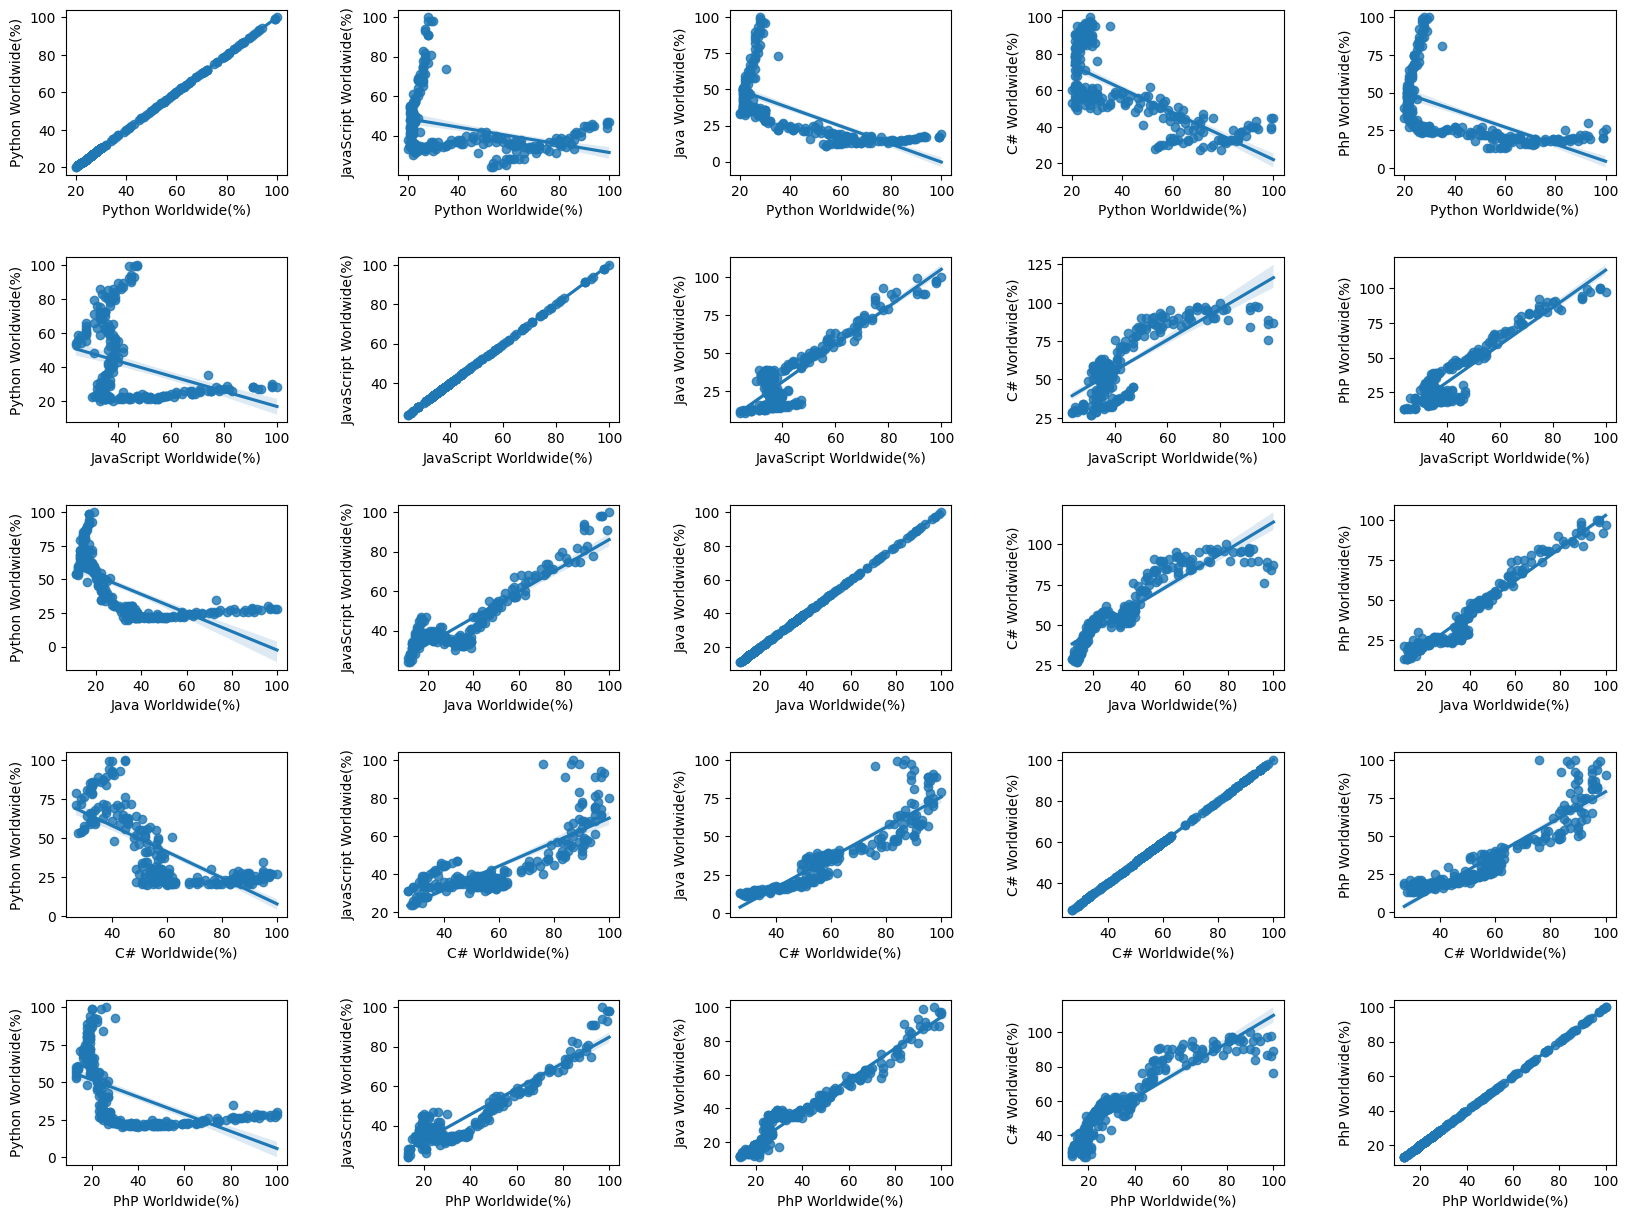

In [11]:
plt.figure(1 , figsize = (20 , 15))
n = 0 
for x in ['Python Worldwide(%)', 'JavaScript Worldwide(%)', 'Java Worldwide(%)','C# Worldwide(%)', 'PhP Worldwide(%)']:
    for y in ['Python Worldwide(%)', 'JavaScript Worldwide(%)', 'Java Worldwide(%)','C# Worldwide(%)', 'PhP Worldwide(%)']:
        n += 1
        plt.subplot(5, 5, n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = df)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()

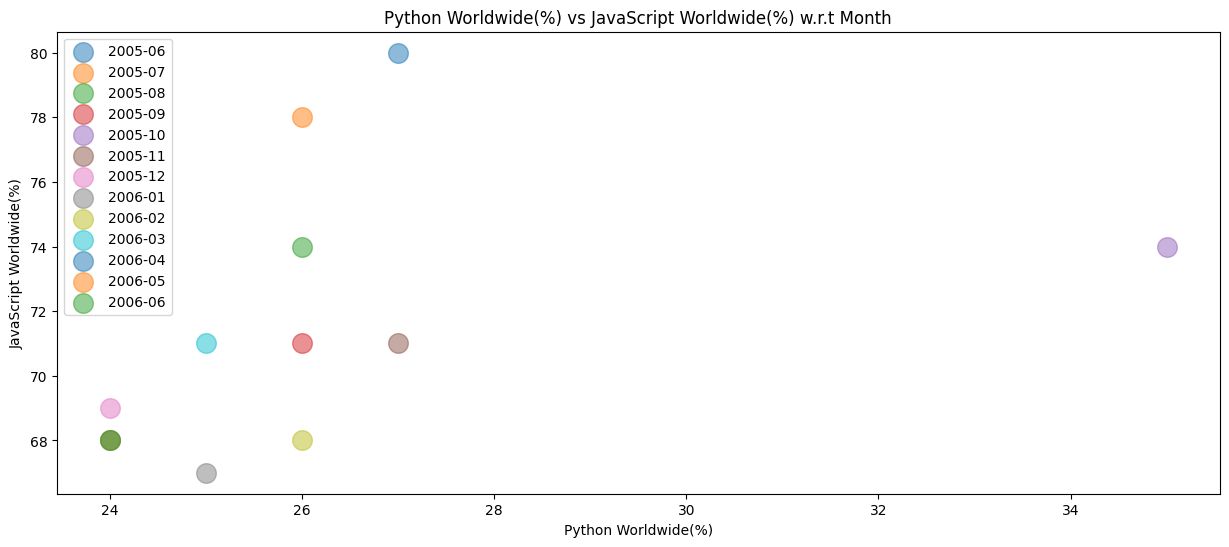

In [12]:
plt.figure(1 , figsize = (15 , 6))
for month in ['2005-06', '2005-07', '2005-08', '2005-09', '2005-10', '2005-11','2005-12', '2006-01', '2006-02', '2006-03','2006-04', '2006-05', '2006-06']:
    plt.scatter(x = 'Python Worldwide(%)' , y = 'JavaScript Worldwide(%)' , data = df[df['Month'] == month] ,
                s = 200 , alpha = 0.5 , label = month)
plt.xlabel('Python Worldwide(%)'), plt.ylabel('JavaScript Worldwide(%)') 
plt.title('Python Worldwide(%) vs JavaScript Worldwide(%) w.r.t Month')
plt.legend()
plt.show()

In [13]:
X1 = df[['Python Worldwide(%)', 'JavaScript Worldwide(%)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n, init='k-means++', n_init = 10, max_iter=300,
                        tol=0.0001,  random_state= 111, algorithm='lloyd') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

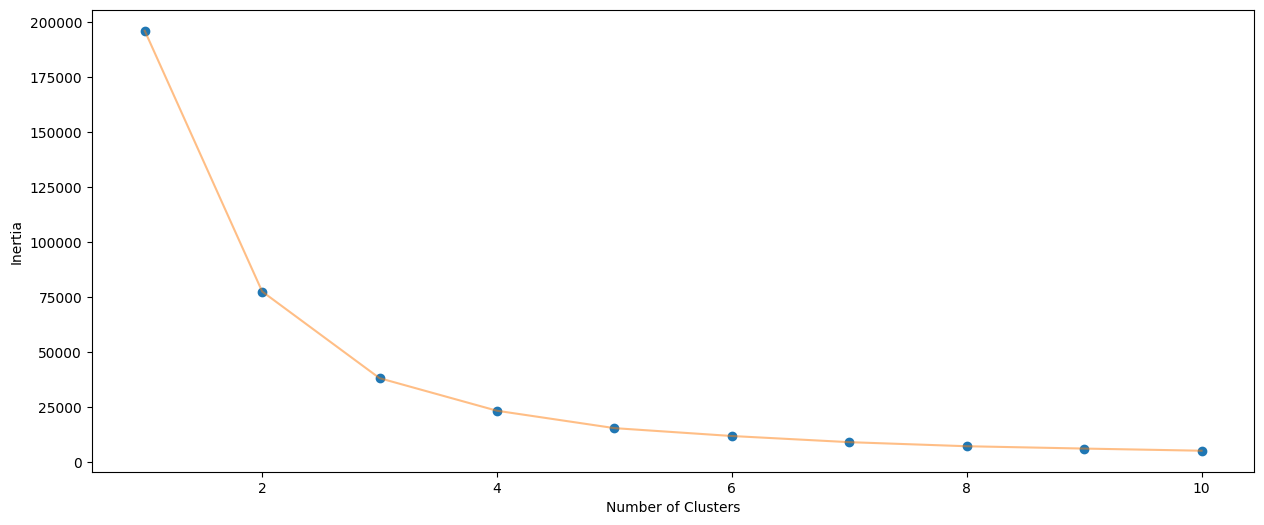

In [14]:
plt.figure(1, figsize = (15, 6))
plt.plot(np.arange(1, 11), inertia, 'o')
plt.plot(np.arange(1, 11), inertia, '-', alpha = 0.5)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

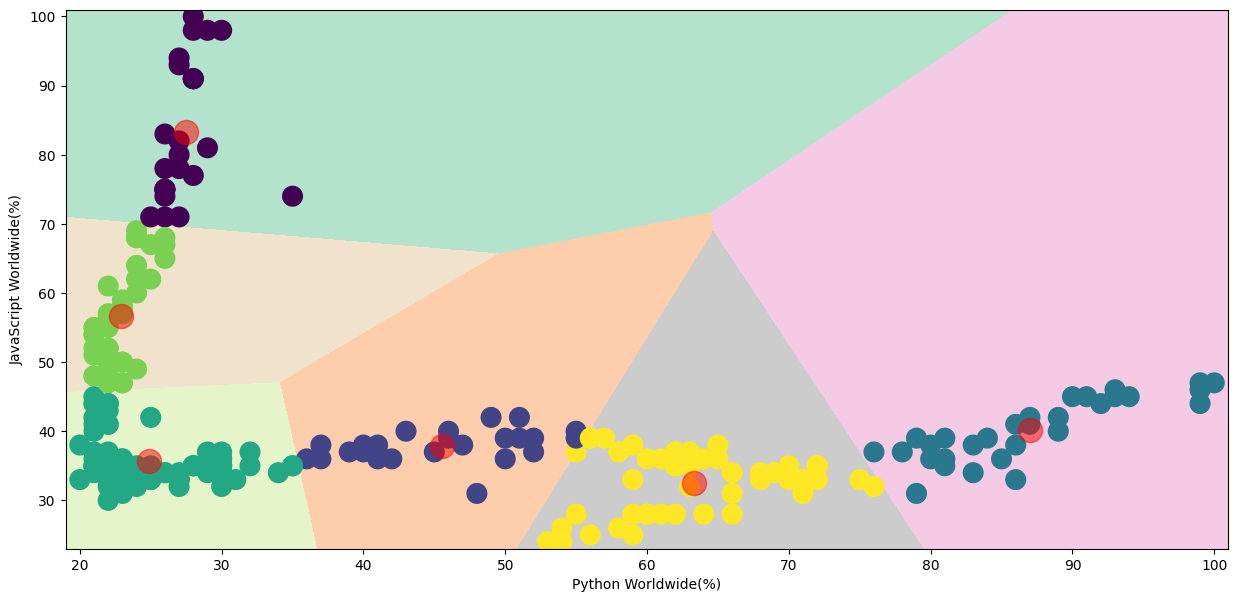

In [15]:
algorithm = (KMeans(n_clusters = 6 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z1 = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z1 = Z1.reshape(xx.shape)
plt.imshow(Z1 , interpolation='nearest', extent=(xx.min(), xx.max(), yy.min(), yy.max()), cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Python Worldwide(%)' ,y = 'JavaScript Worldwide(%)' , data = df , c = labels1 , s = 200 )
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('JavaScript Worldwide(%)') , plt.xlabel('Python Worldwide(%)')
plt.show()

In [16]:
X2 = df[['Java Worldwide(%)', 'C# Worldwide(%)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n, init='k-means++', n_init = 10, max_iter=300,
                        tol=0.0001,  random_state= 111, algorithm='lloyd') )
    algorithm.fit(X2)
    inertia.append(algorithm.inertia_)

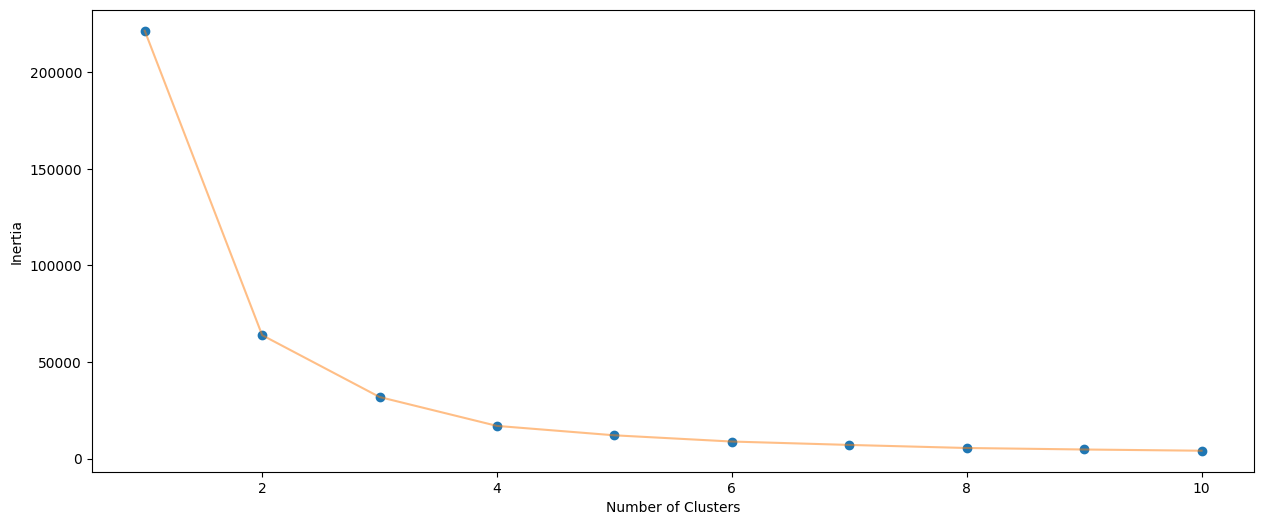

In [17]:
plt.figure(1, figsize = (15, 6))
plt.plot(np.arange(1, 11), inertia, 'o')
plt.plot(np.arange(1, 11), inertia, '-', alpha = 0.5)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

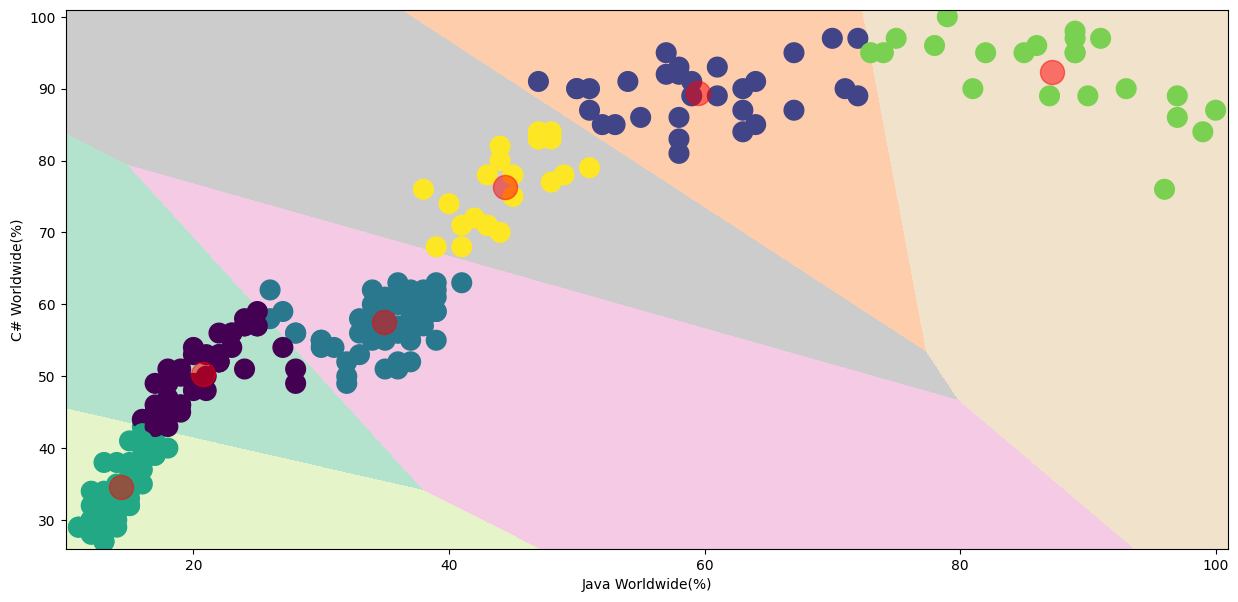

In [18]:
algorithm = (KMeans(n_clusters = 6 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X2)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

h = 0.02
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z2 = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z2 = Z2.reshape(xx.shape)
plt.imshow(Z2 , interpolation='nearest', extent=(xx.min(), xx.max(), yy.min(), yy.max()), cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Java Worldwide(%)' ,y = 'C# Worldwide(%)' , data = df , c = labels1 , s = 200 )
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('C# Worldwide(%)') , plt.xlabel('Java Worldwide(%)')
plt.show()

In [19]:
X3 = df[['PhP Worldwide(%)', 'Flutter Worldwide(%)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n, init='k-means++', n_init = 10, max_iter=300,
                        tol=0.0001,  random_state= 111, algorithm='lloyd') )
    algorithm.fit(X3)
    inertia.append(algorithm.inertia_)

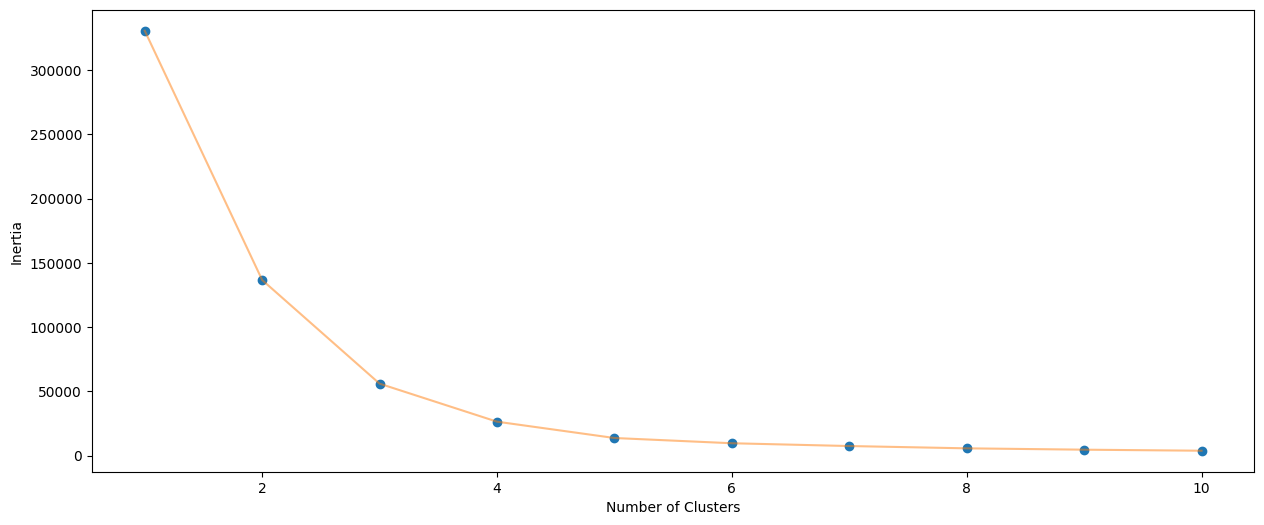

In [20]:
plt.figure(1, figsize = (15, 6))
plt.plot(np.arange(1, 11), inertia, 'o')
plt.plot(np.arange(1, 11), inertia, '-', alpha = 0.5)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

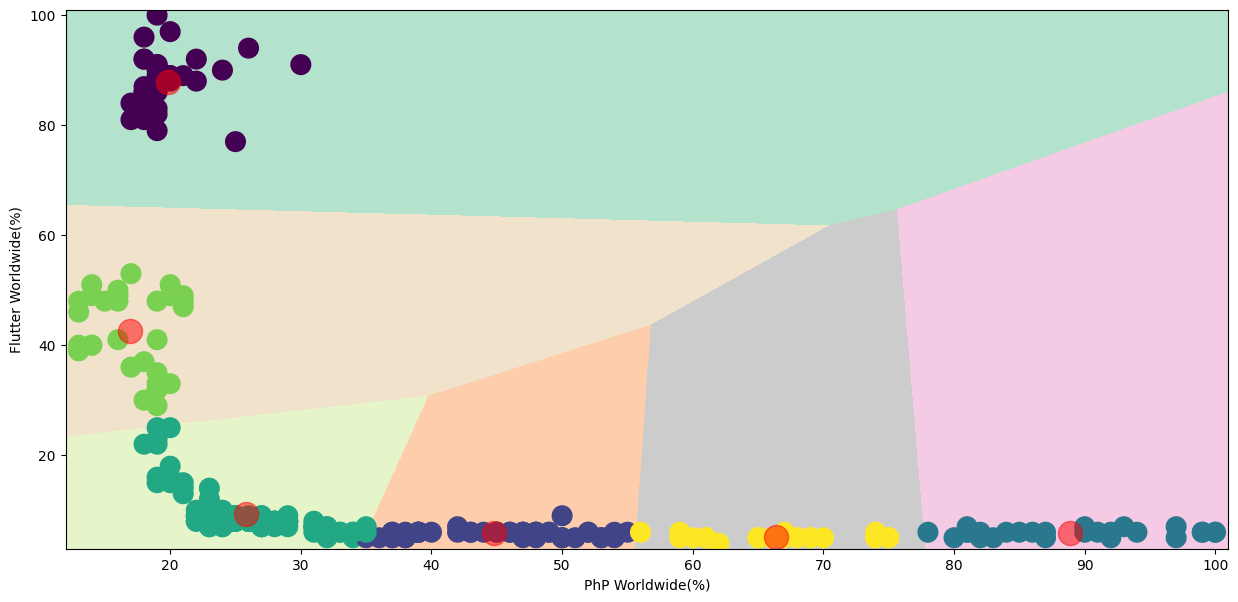

In [21]:
algorithm = (KMeans(n_clusters = 6 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X3)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

h = 0.02
x_min, x_max = X3[:, 0].min() - 1, X3[:, 0].max() + 1
y_min, y_max = X3[:, 1].min() - 1, X3[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z3 = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z3 = Z3.reshape(xx.shape)
plt.imshow(Z3 , interpolation='nearest', extent=(xx.min(), xx.max(), yy.min(), yy.max()), cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'PhP Worldwide(%)' ,y = 'Flutter Worldwide(%)' , data = df , c = labels1 , s = 200 )
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Flutter Worldwide(%)') , plt.xlabel('PhP Worldwide(%)')
plt.show()

In [22]:
X4 = df[['React Worldwide(%)', 'Swift Worldwide(%)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n, init='k-means++', n_init = 10, max_iter=300,
                        tol=0.0001,  random_state= 111, algorithm='lloyd') )
    algorithm.fit(X4)
    inertia.append(algorithm.inertia_)

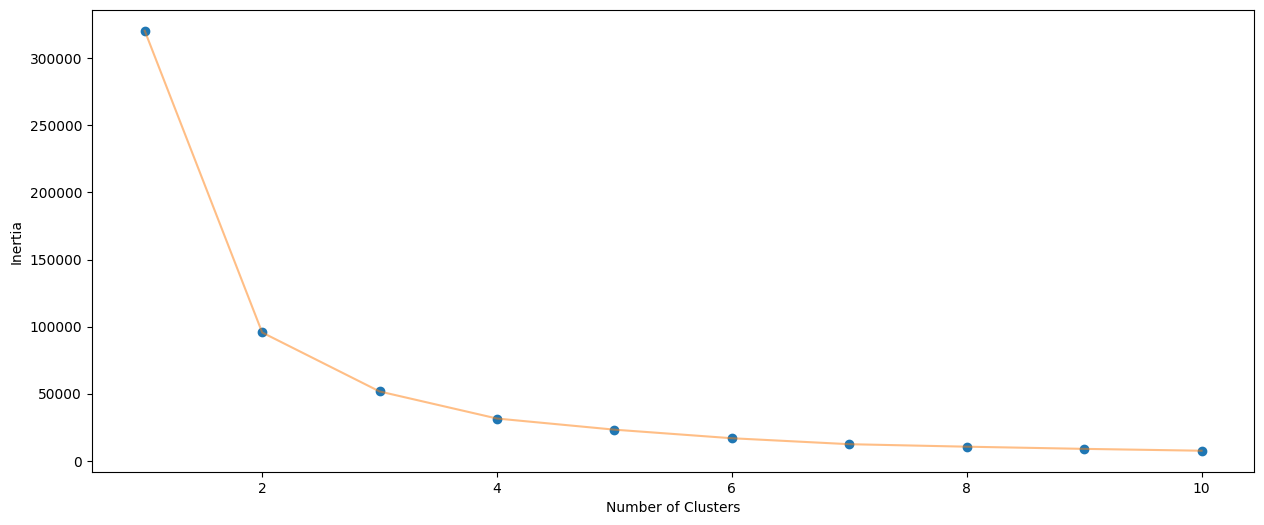

In [23]:
plt.figure(1, figsize = (15, 6))
plt.plot(np.arange(1, 11), inertia, 'o')
plt.plot(np.arange(1, 11), inertia, '-', alpha = 0.5)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

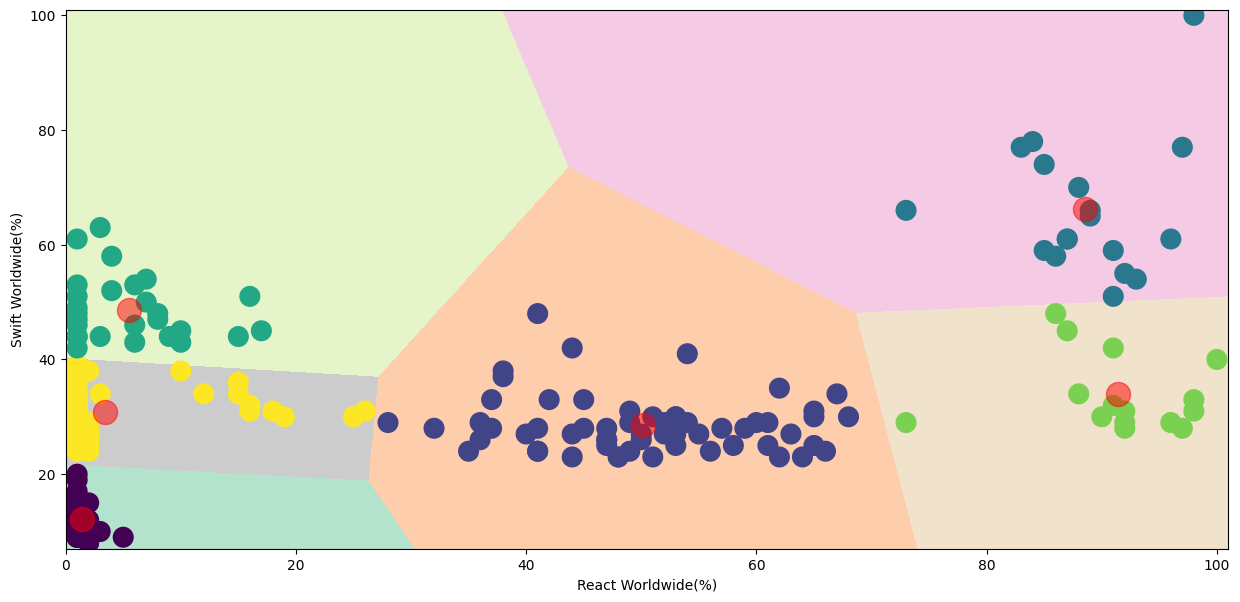

In [24]:
algorithm = (KMeans(n_clusters = 6 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X4)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

h = 0.02
x_min, x_max = X4[:, 0].min() - 1, X4[:, 0].max() + 1
y_min, y_max = X4[:, 1].min() - 1, X4[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z4 = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z4 = Z4.reshape(xx.shape)
plt.imshow(Z4 , interpolation='nearest', extent=(xx.min(), xx.max(), yy.min(), yy.max()), cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'React Worldwide(%)' ,y = 'Swift Worldwide(%)' , data = df , c = labels1 , s = 200 )
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Swift Worldwide(%)') , plt.xlabel('React Worldwide(%)')
plt.show()

In [25]:
X5 = df[['TypeScript Worldwide(%)', 'Matlab Worldwide(%)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n, init='k-means++', n_init = 10, max_iter=300,
                        tol=0.0001,  random_state= 111, algorithm='lloyd') )
    algorithm.fit(X5)
    inertia.append(algorithm.inertia_)

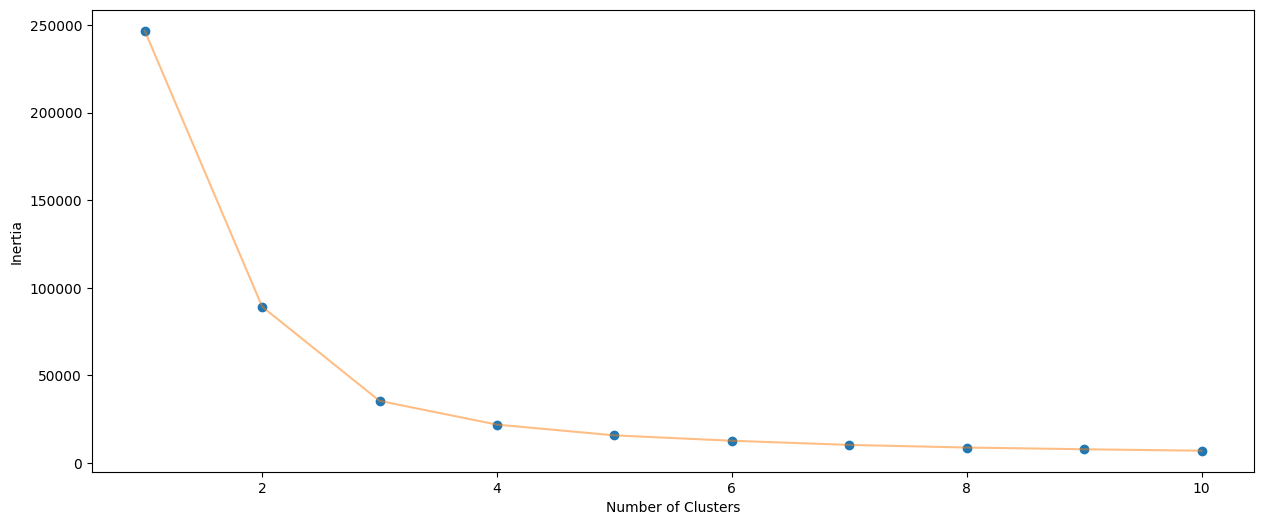

In [26]:
plt.figure(1, figsize = (15, 6))
plt.plot(np.arange(1, 11), inertia, 'o')
plt.plot(np.arange(1, 11), inertia, '-', alpha = 0.5)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

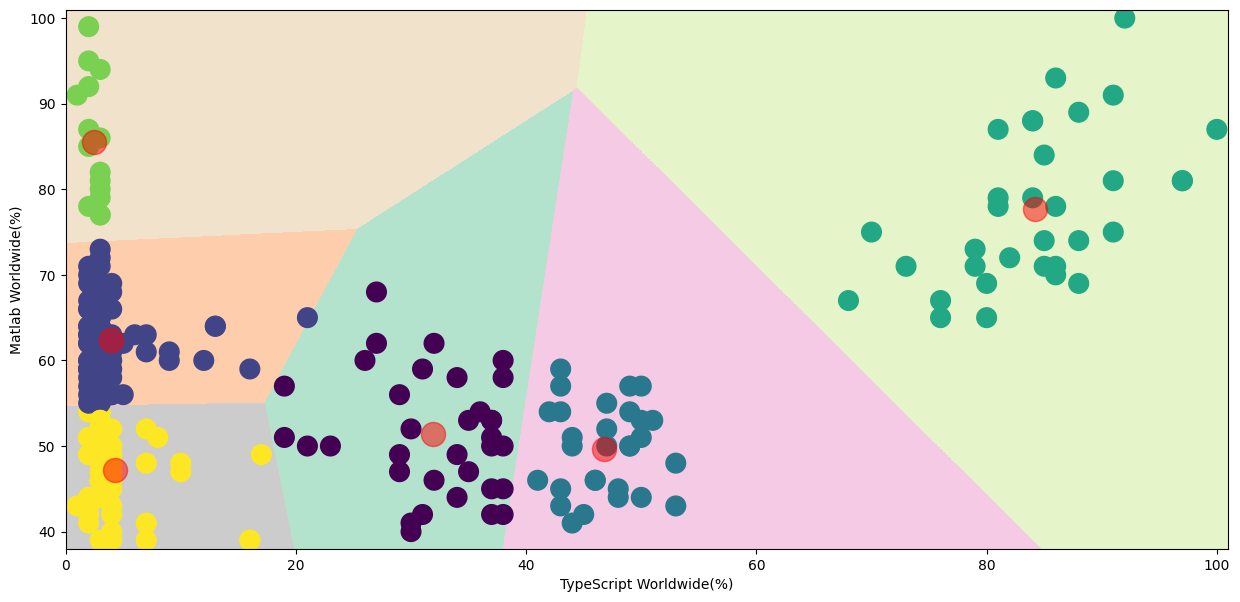

In [27]:
algorithm = (KMeans(n_clusters = 6 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X5)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

h = 0.02
x_min, x_max = X5[:, 0].min() - 1, X5[:, 0].max() + 1
y_min, y_max = X5[:, 1].min() - 1, X5[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z5 = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z5 = Z5.reshape(xx.shape)
plt.imshow(Z5 , interpolation='nearest', extent=(xx.min(), xx.max(), yy.min(), yy.max()), cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'TypeScript Worldwide(%)' ,y = 'Matlab Worldwide(%)' , data = df , c = labels1 , s = 200 )
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Matlab Worldwide(%)') , plt.xlabel('TypeScript Worldwide(%)')
plt.show()